In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
real = pd.read_csv("../dataset/pm25_ground.txt").drop(['datetime'], axis = 1)
real = real.reset_index(drop=True)
target2 = torch.tensor(real.values).T.to(device).reshape(36,len(real))
input = torch.tensor(real.index + 1, dtype=float).to(device)

In [3]:
df = pd.read_csv("../dataset/pm25_missing.txt").drop(['datetime'], axis = 1)
df = df.reset_index(drop=True)
target = torch.tensor(df.values).T.to(device).reshape(36,len(df))
input = torch.tensor(df.index + 1, dtype=float).to(device)

In [4]:
model = torch.load('./result/air_100_10.0.pt')

In [5]:
missing_index = torch.where(target.isnan(), 0.0, 1.0)
real_missing = torch.where(target2.isnan(), 0.0, 1.0)

In [6]:
a = real_missing - missing_index

C:\Users\chanyoung\AppData\Local\Temp\ipykernel_13288\84992418.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30,5))


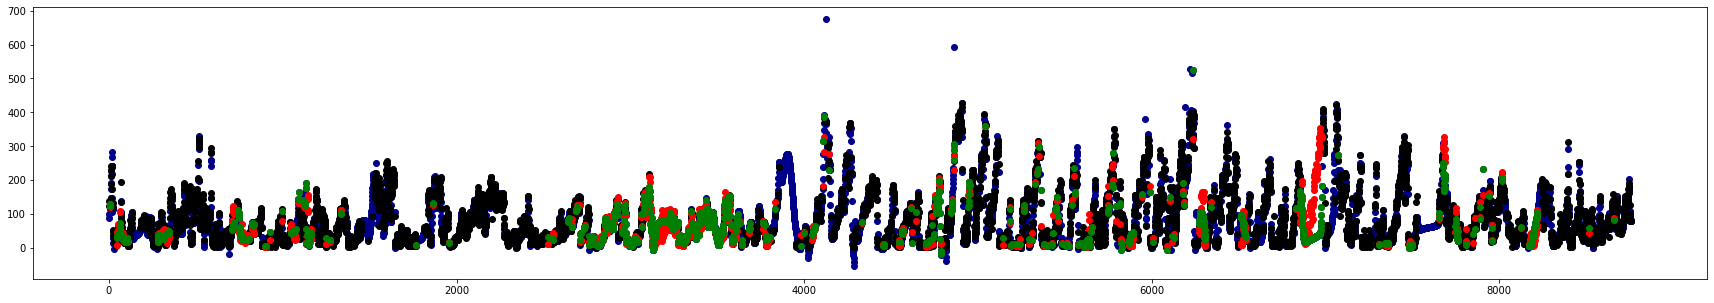

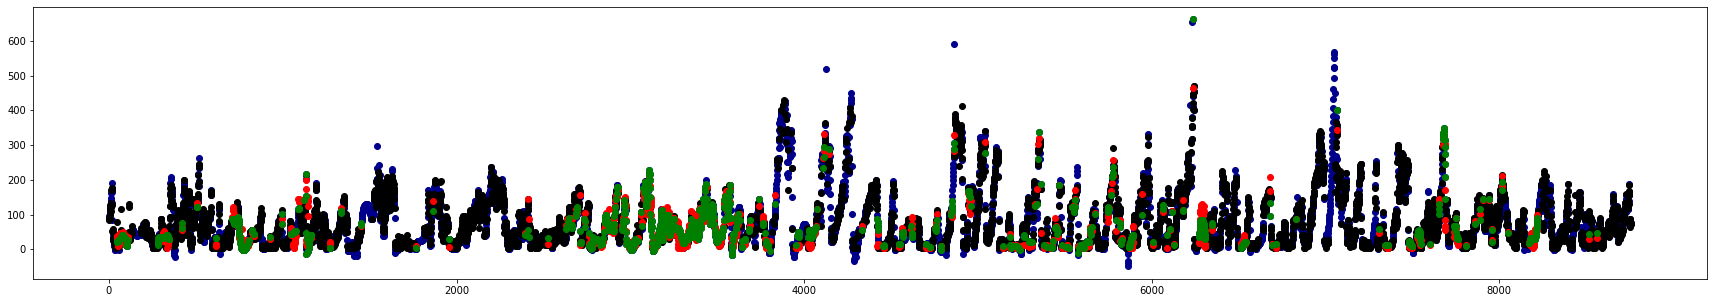

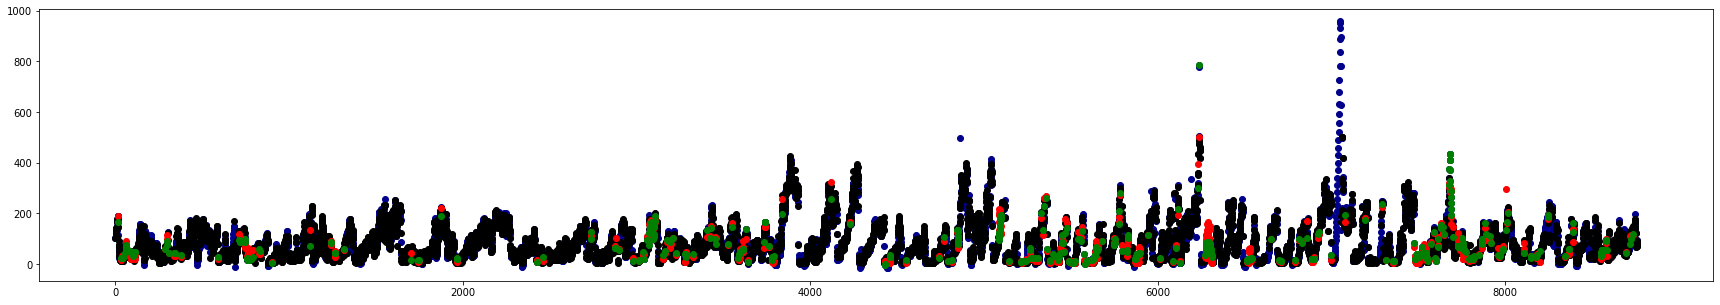

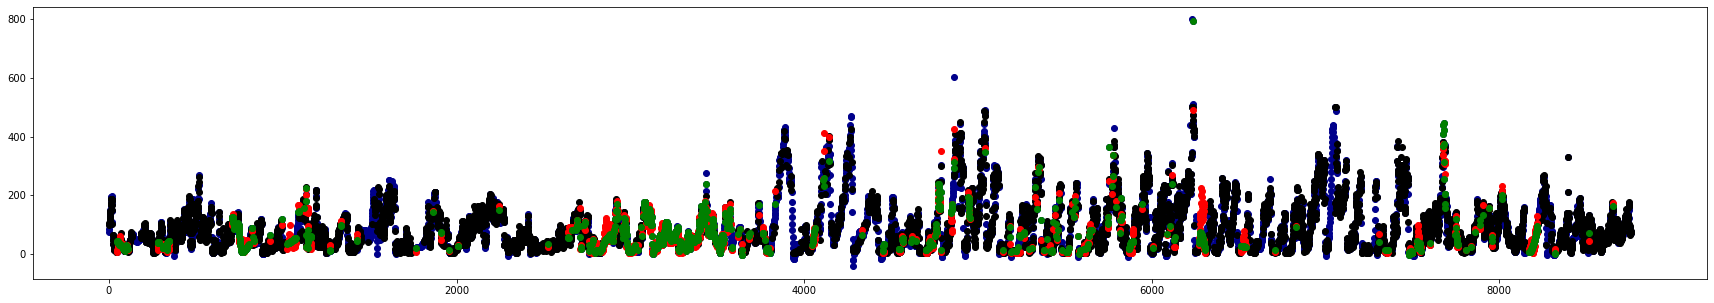

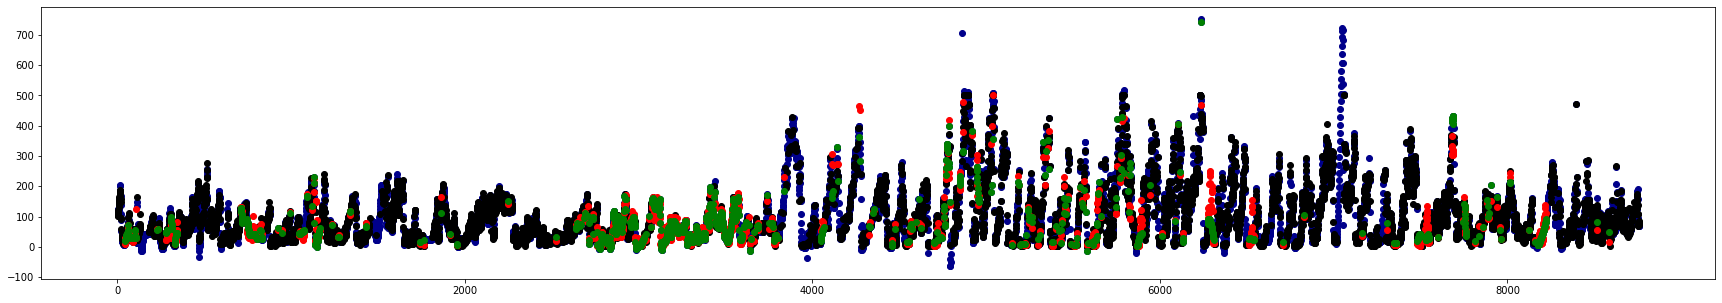

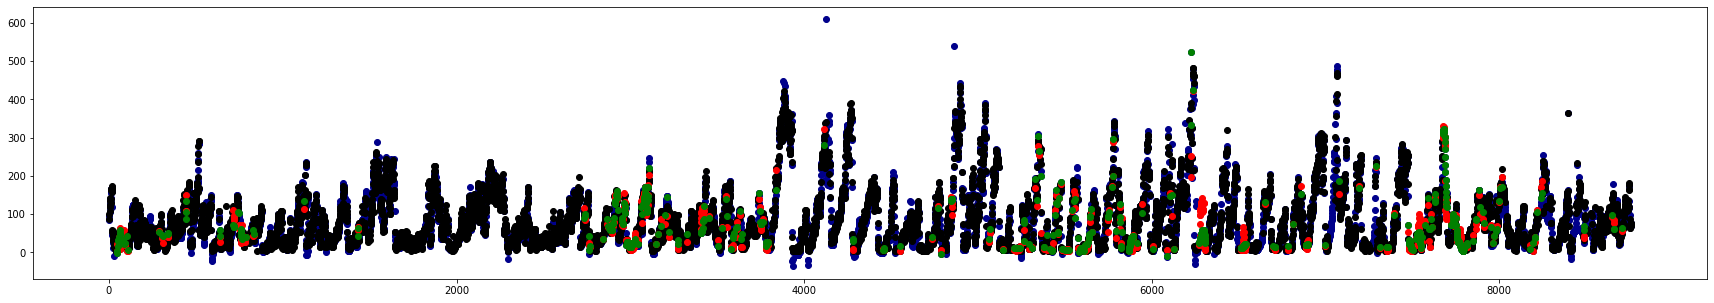

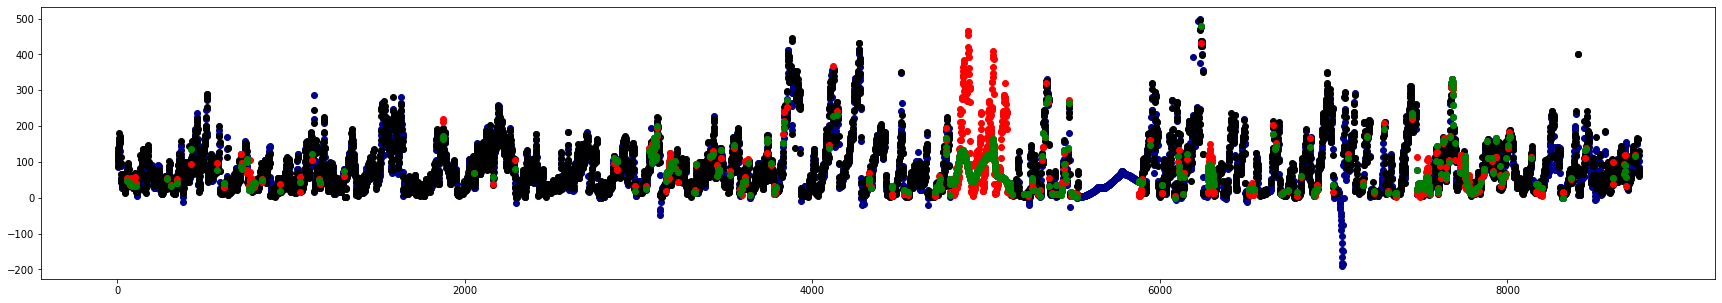

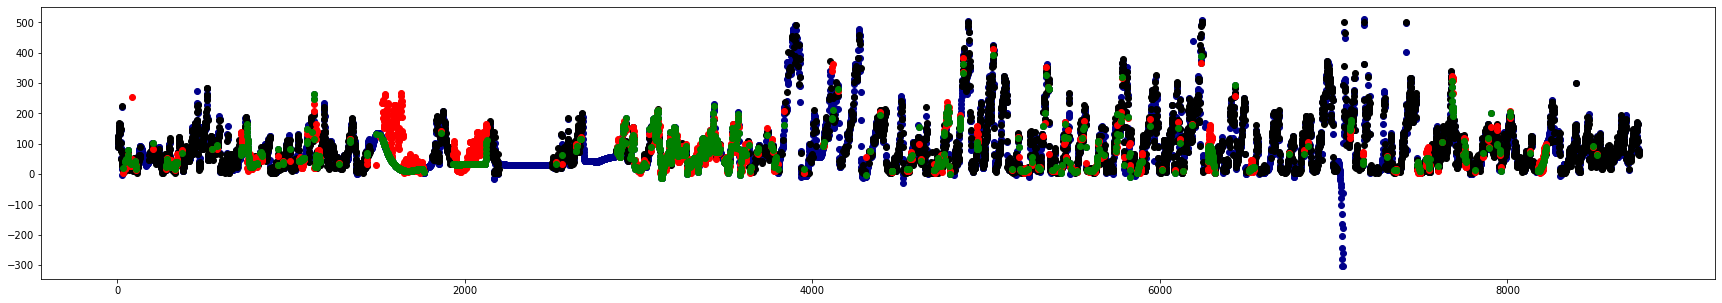

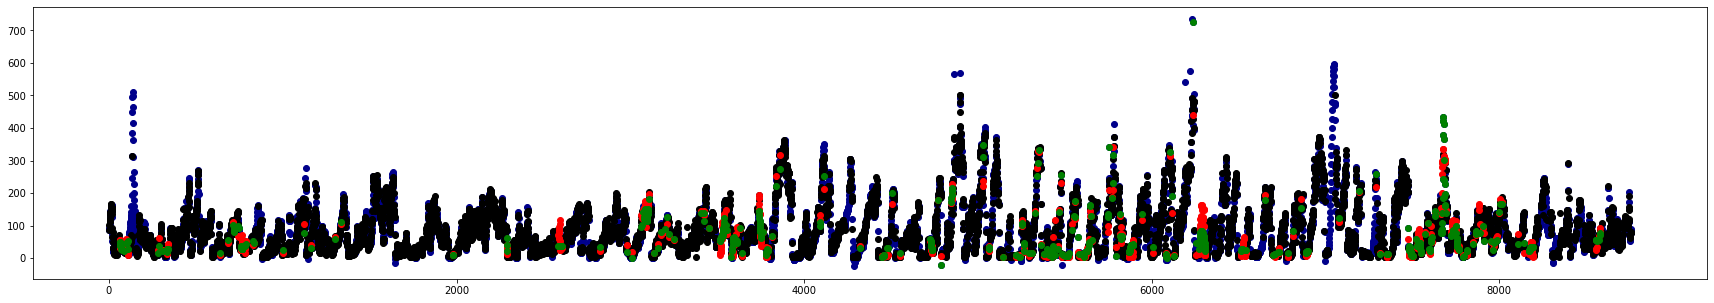

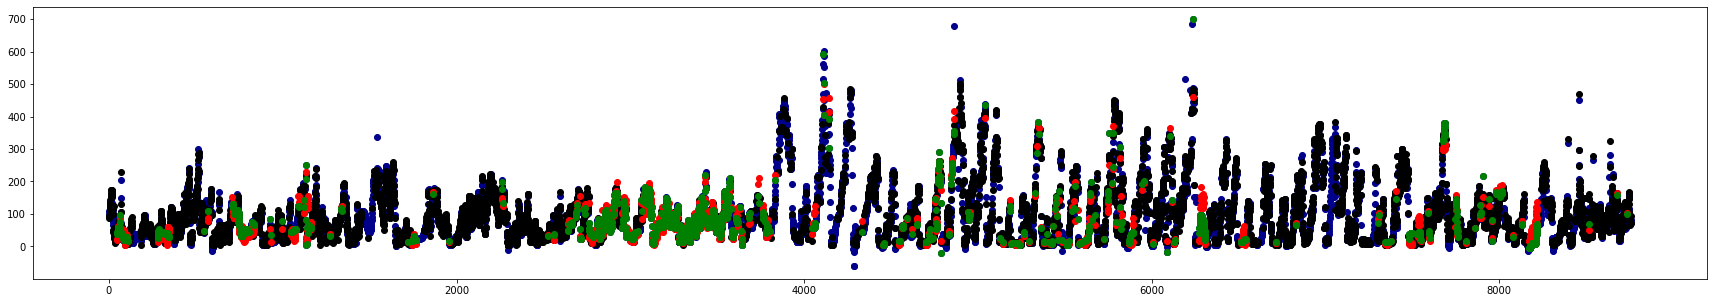

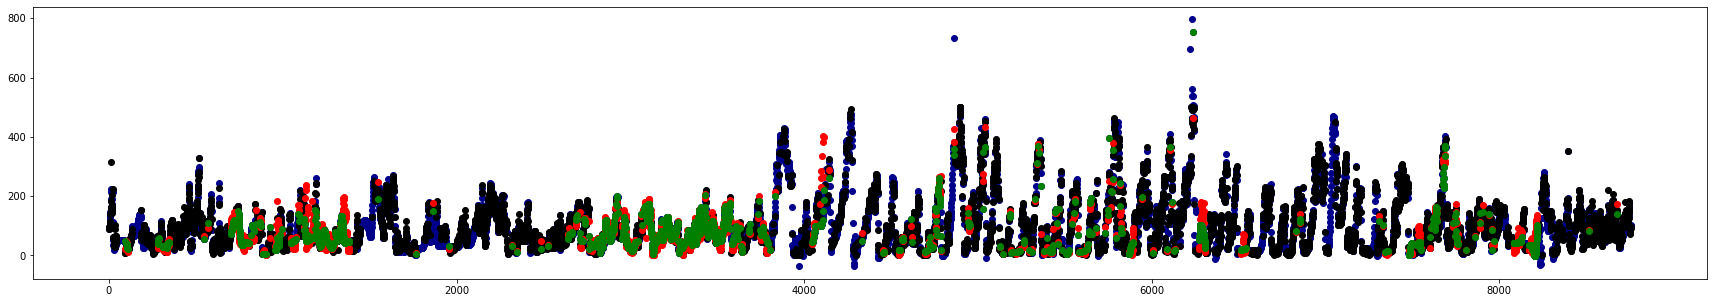

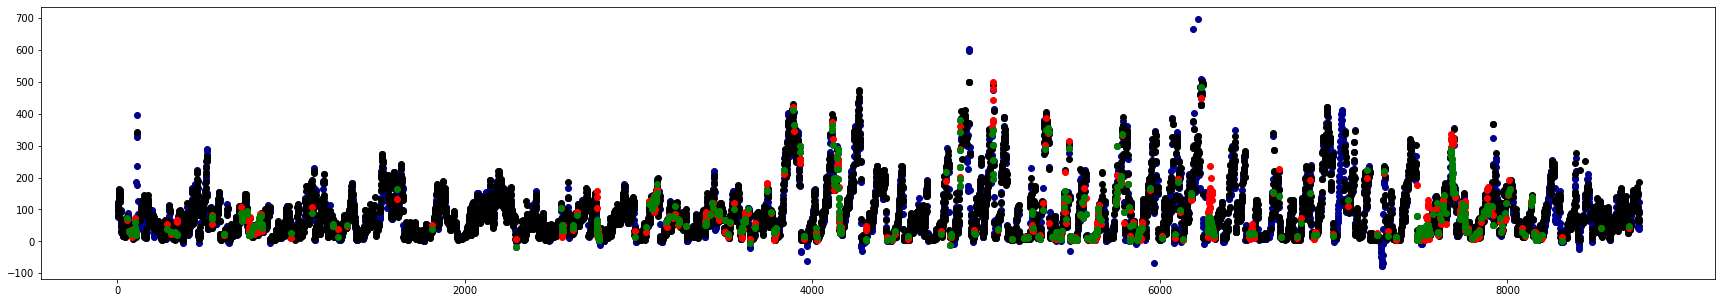

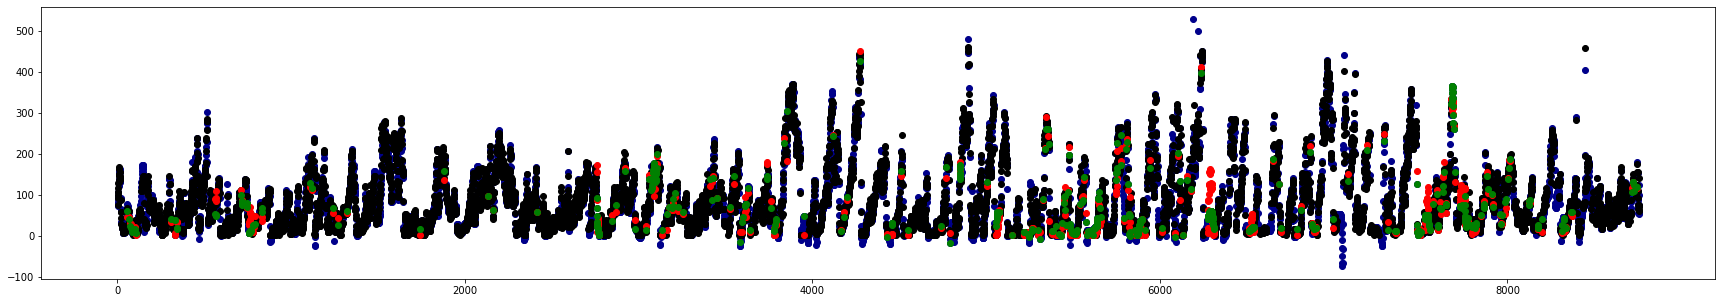

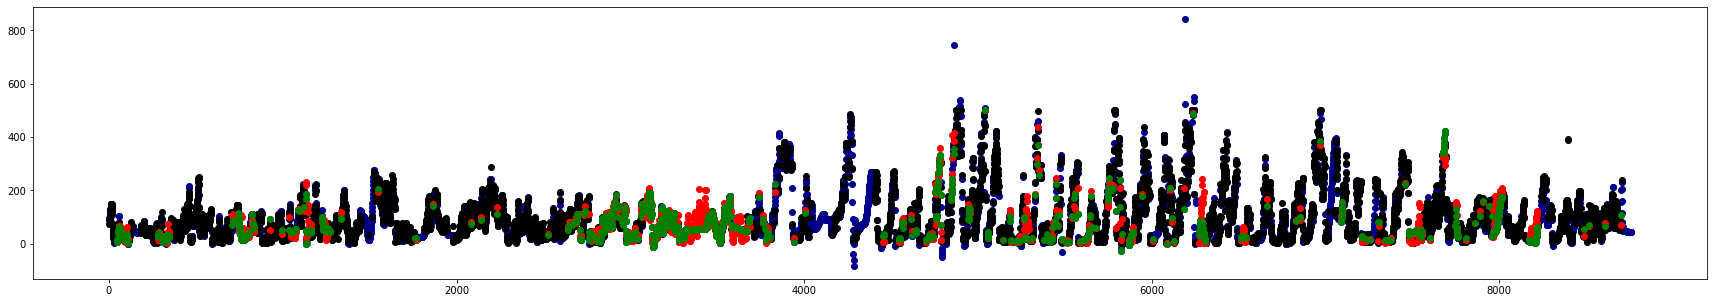

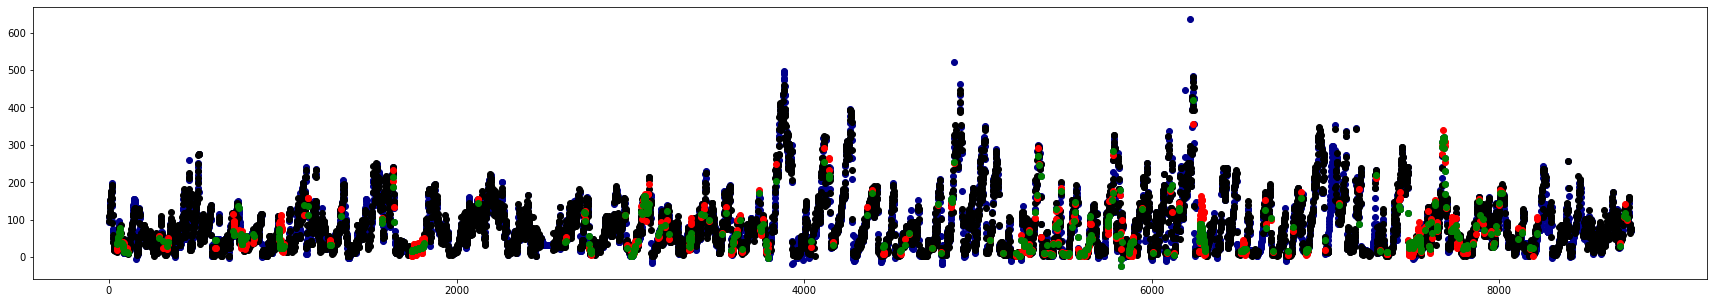

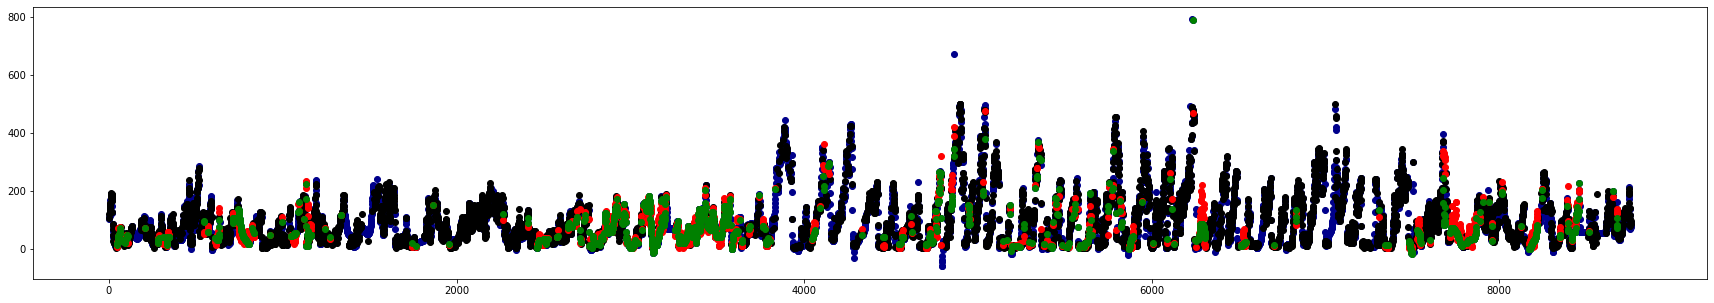

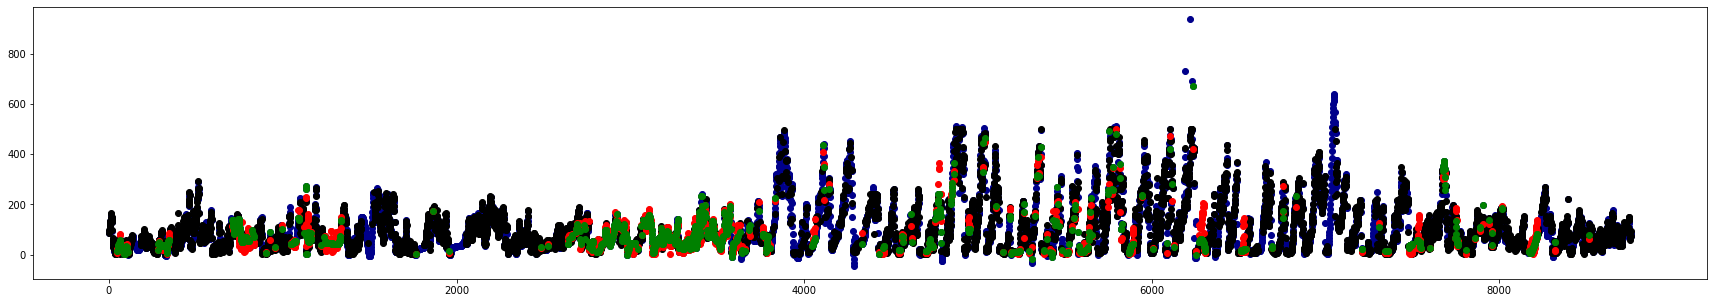

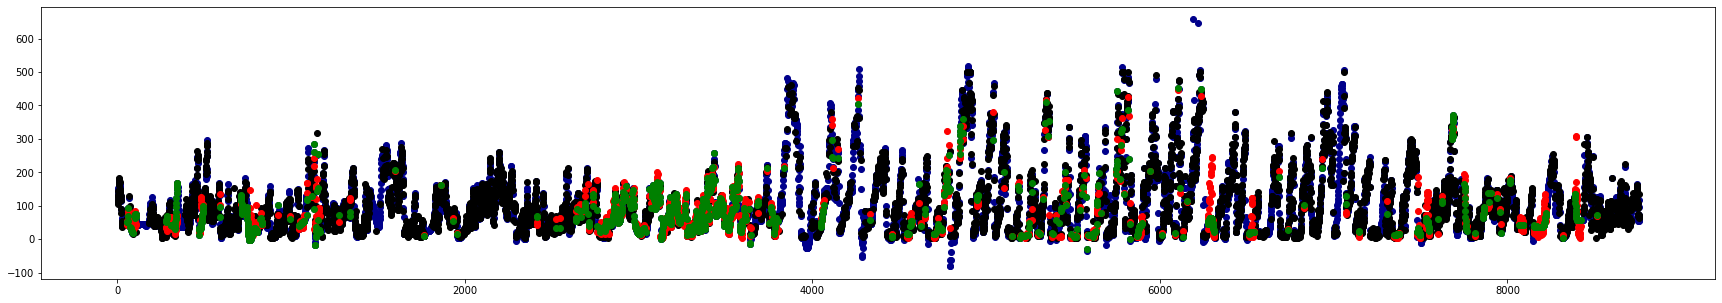

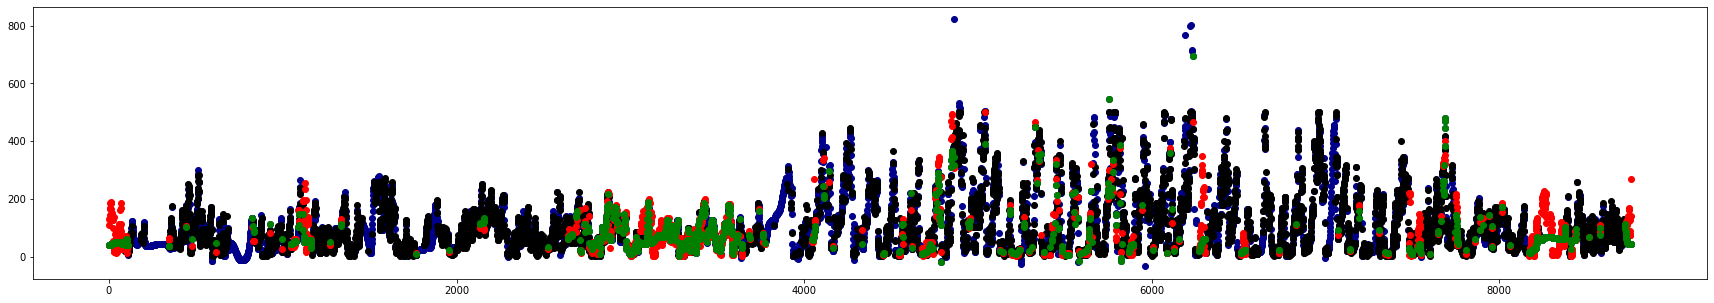

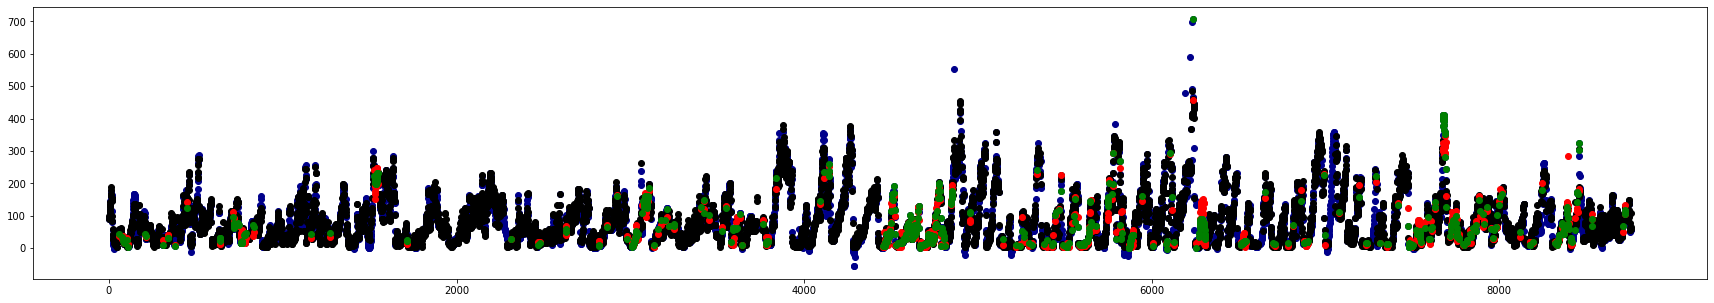

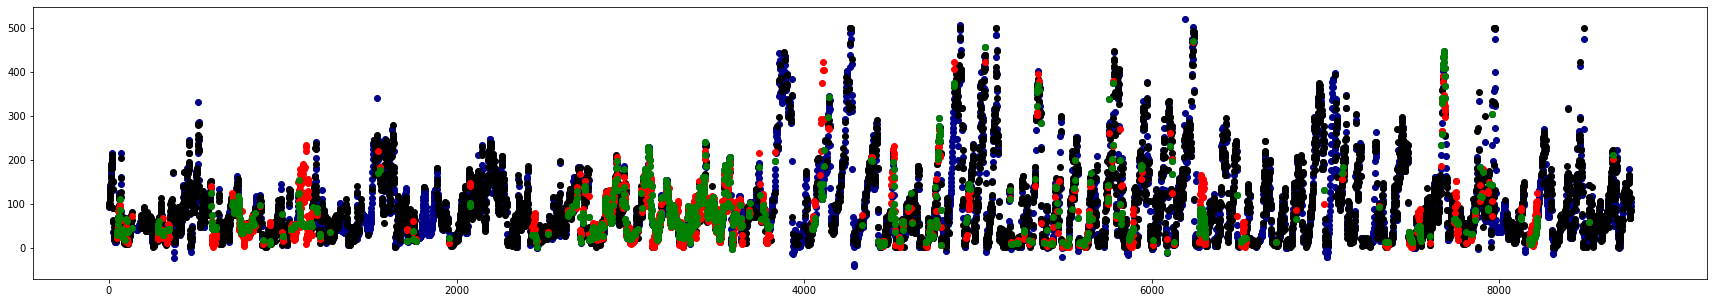

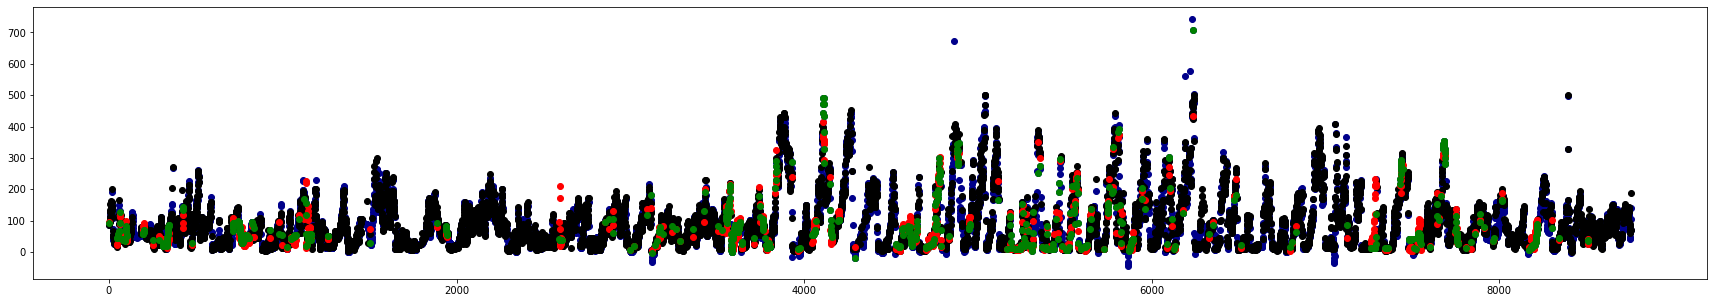

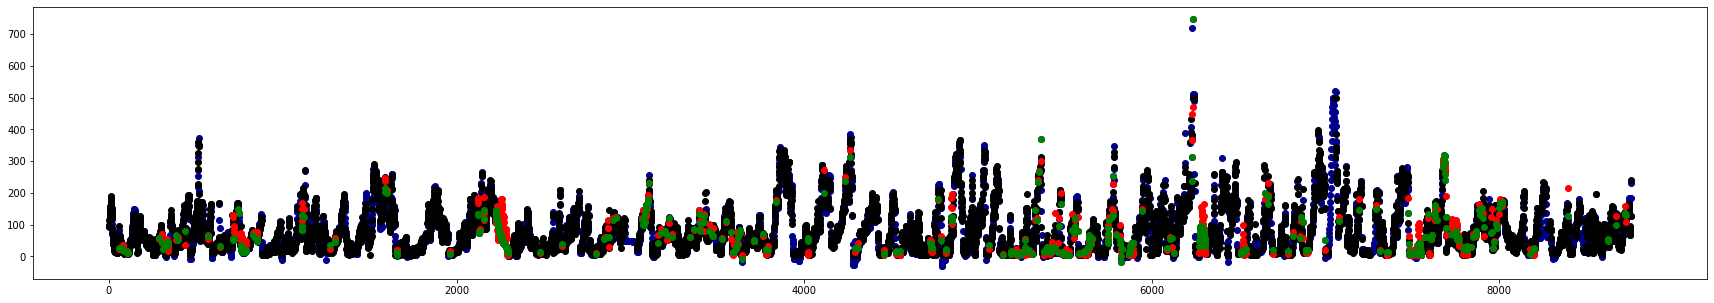

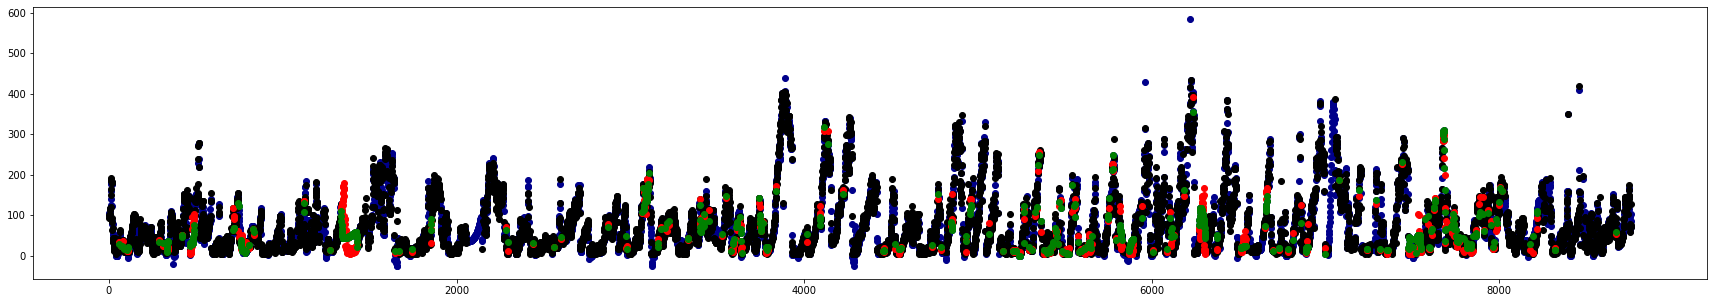

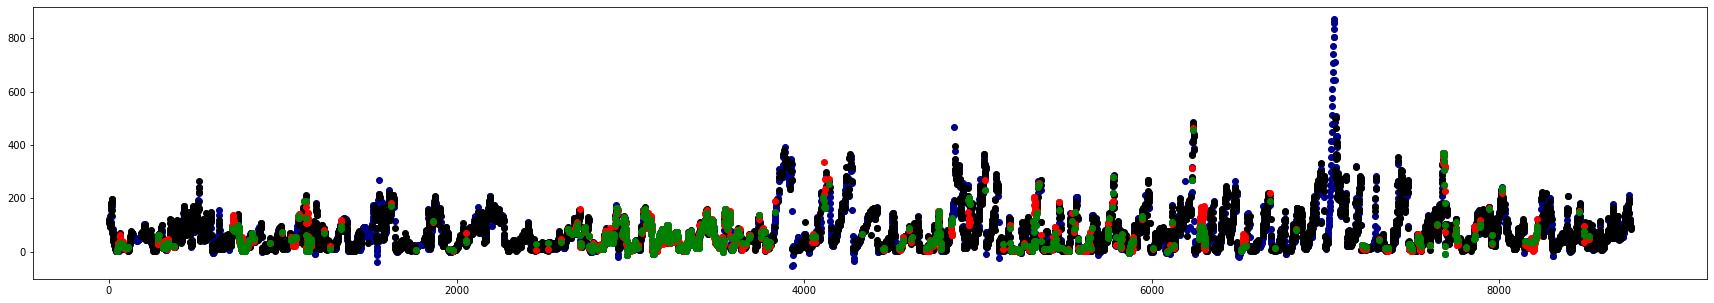

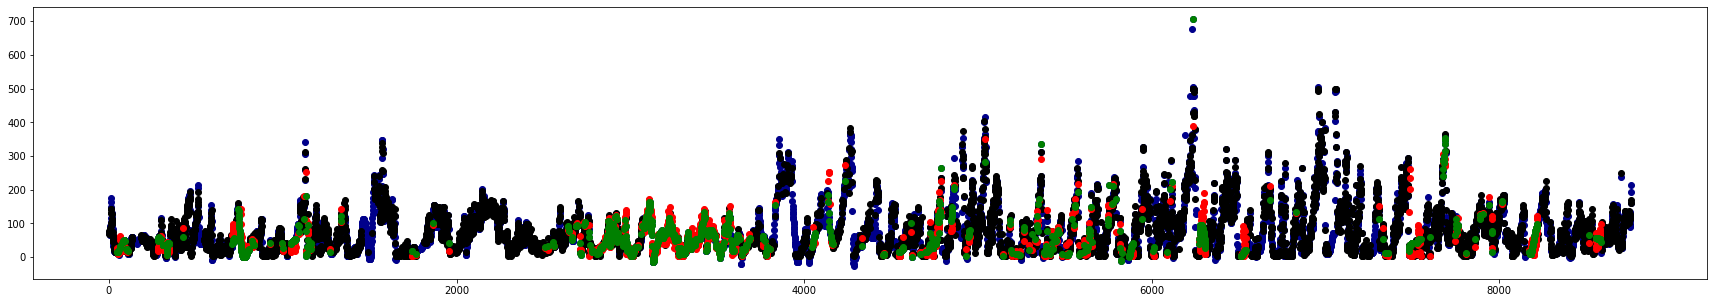

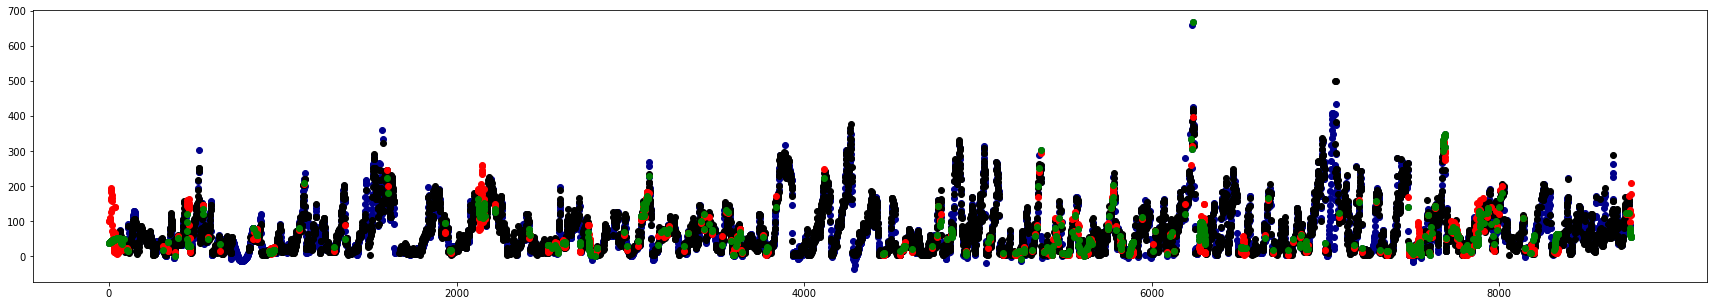

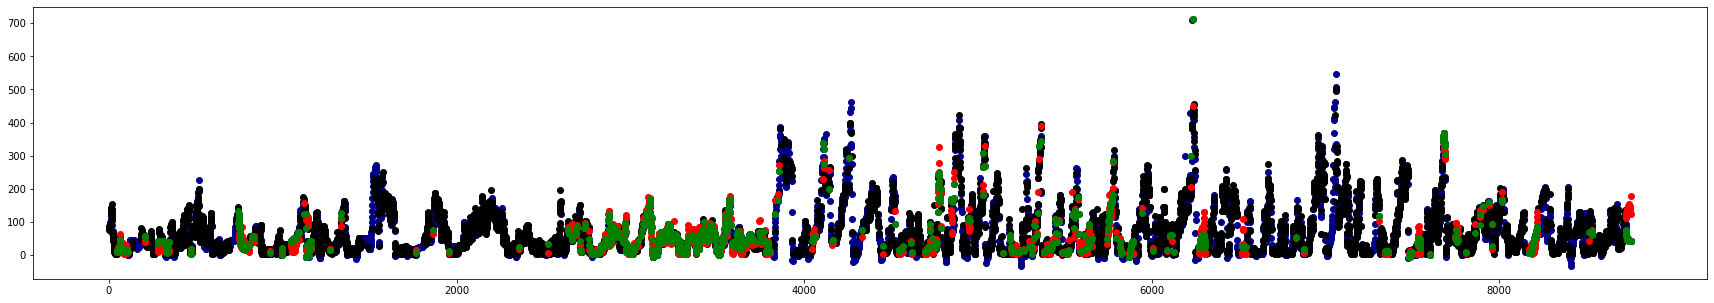

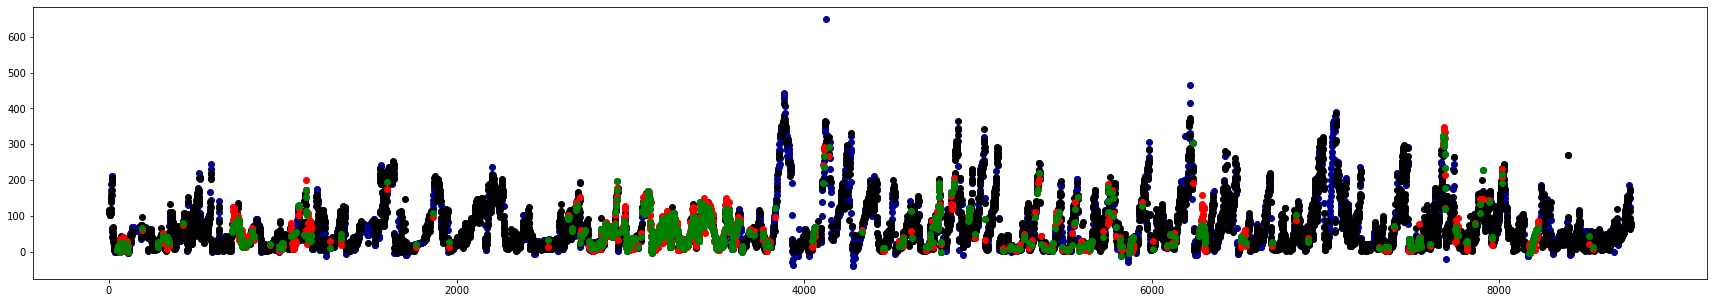

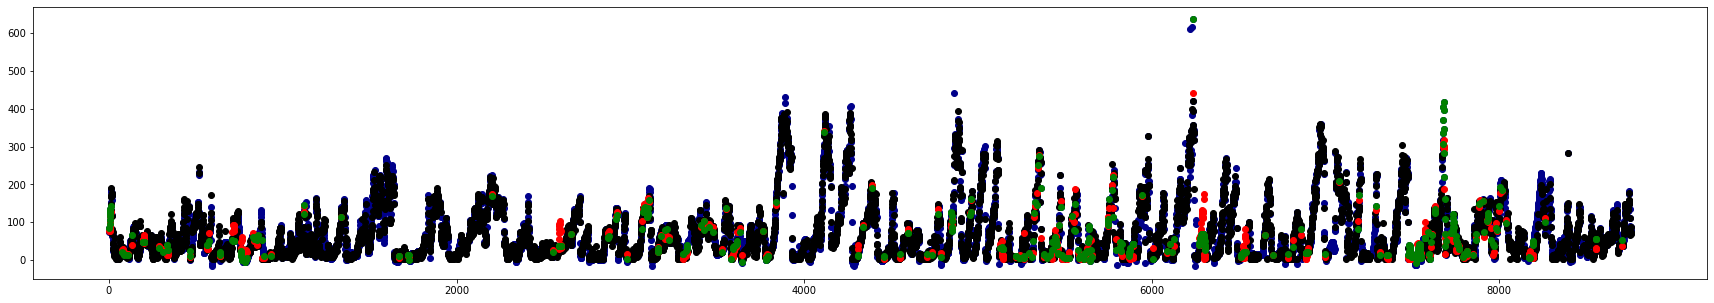

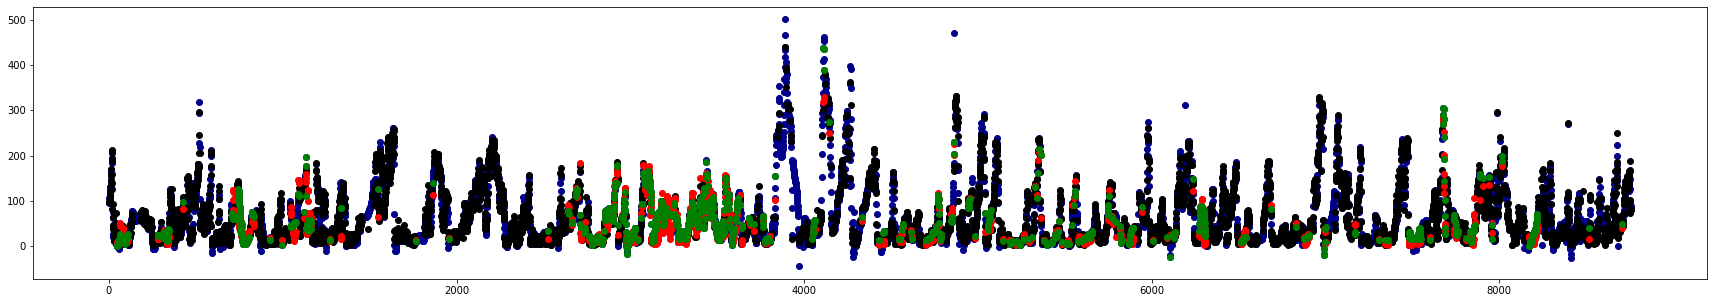

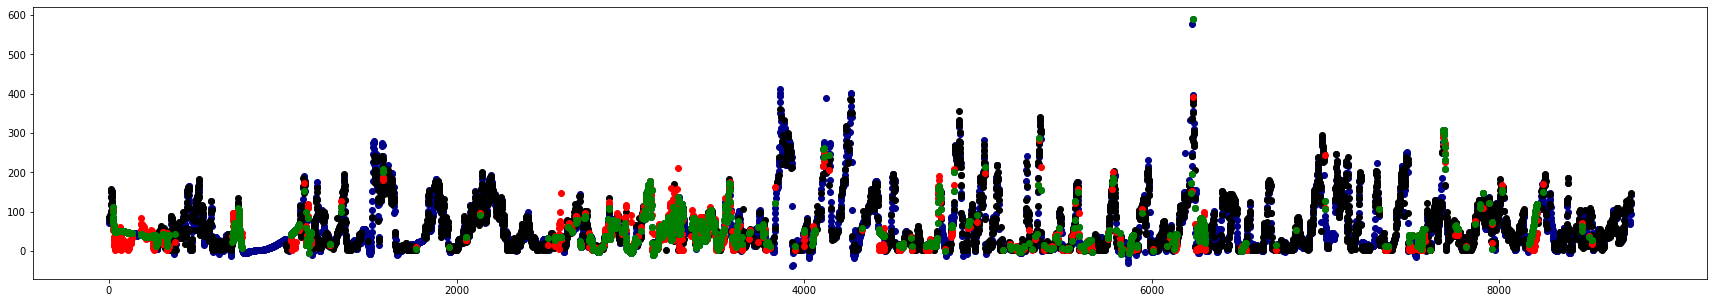

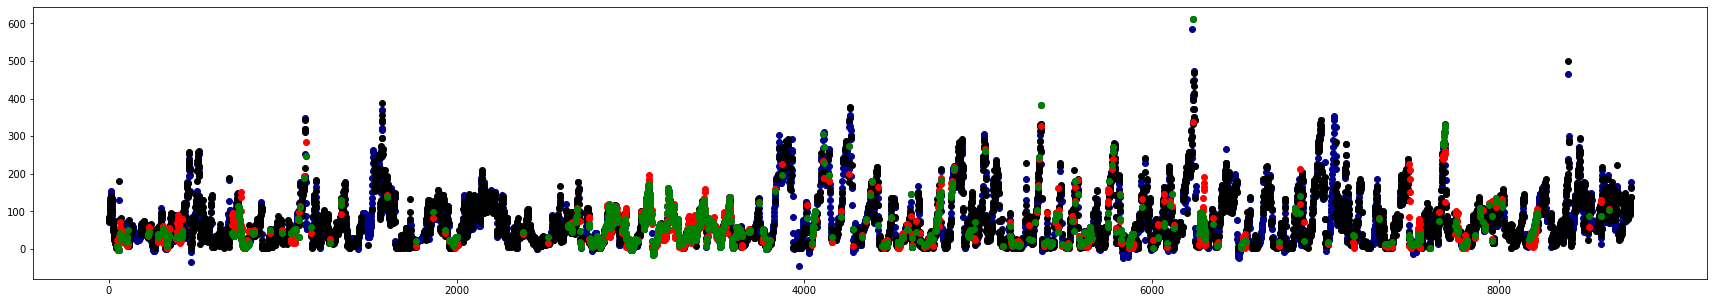

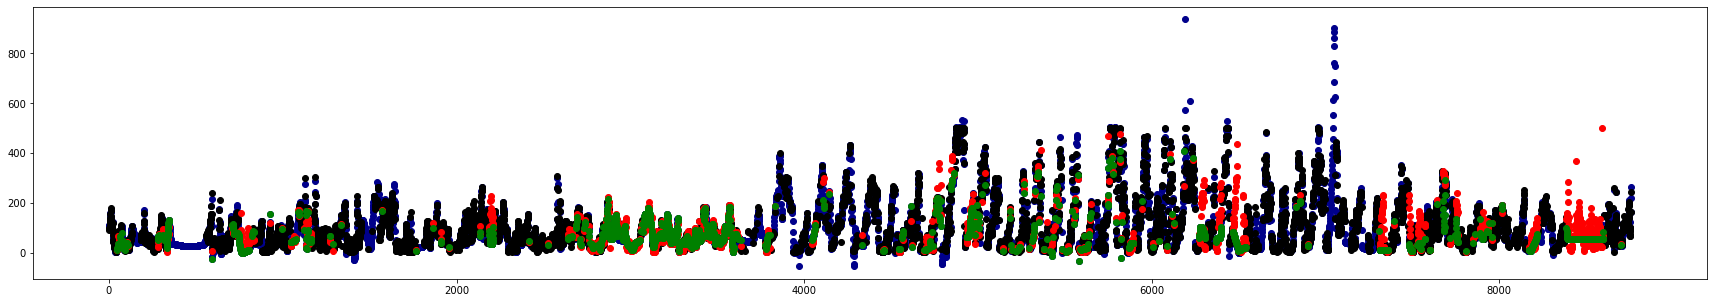

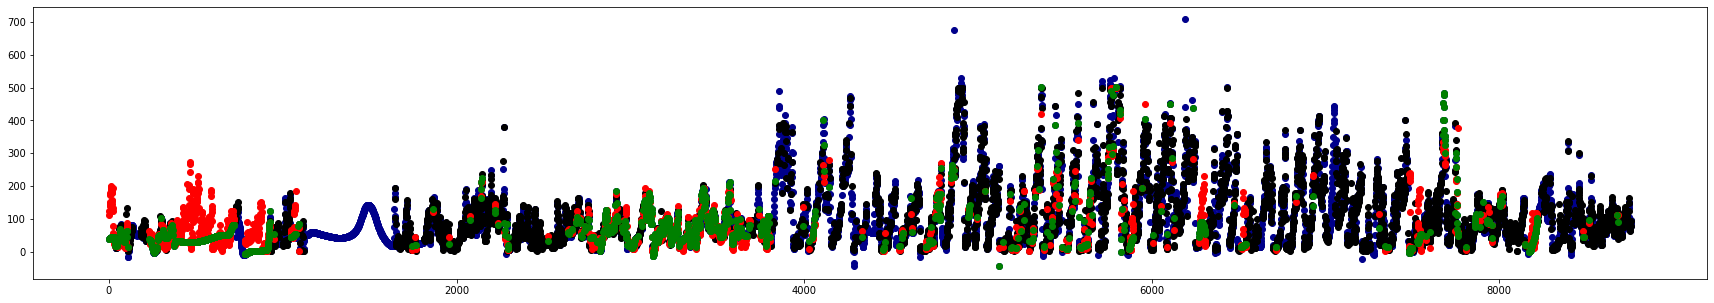

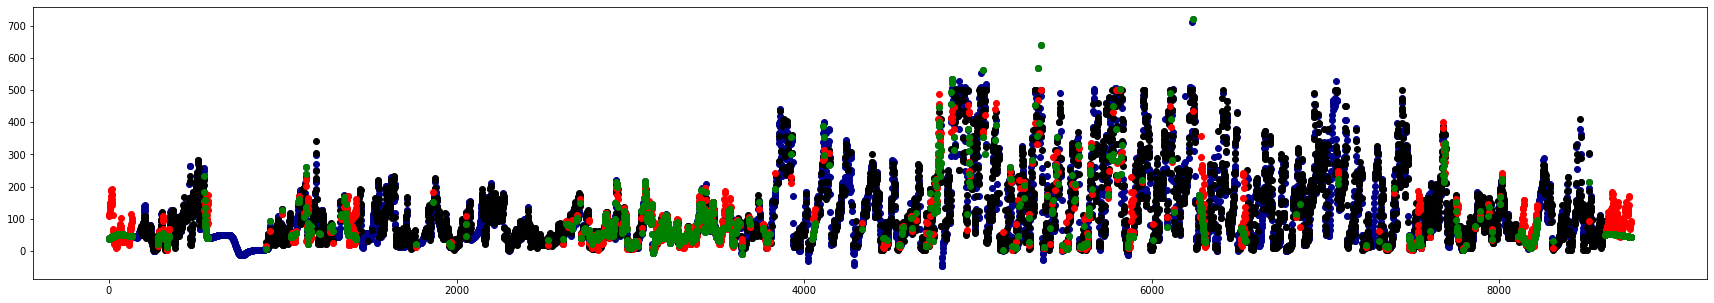

In [11]:
pred_ = model.pred(input)[1]
missing_index = torch.where(target.isnan(), 0.0, 1.0)
for i in range(36):
    plt.figure(figsize=(30,5))
    plt.scatter(input.cpu().detach().numpy(), pred_[i].cpu().detach().numpy(), c = 'darkBlue')
    plt.scatter(input.cpu().detach().numpy(), target[i].cpu().detach().numpy(), c = "Black")
    plt.scatter(input[a[i] != 0].cpu().detach().numpy(), target2[i][a[i] != 0].cpu().detach().numpy(), c = "Red")
    plt.scatter(input[a[i] != 0].cpu().detach().numpy(), pred_[i][a[i] != 0].cpu().detach().numpy(), c = "Green")

In [9]:
torch.where(pred_[i][missing_index[i] != 0] < 00)

(tensor([   0,    1,    2,  ..., 5727, 5728, 5729], device='cuda:0'),)

C:\Users\chanyoung\AppData\Local\Temp\ipykernel_30456\483280396.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30,5))


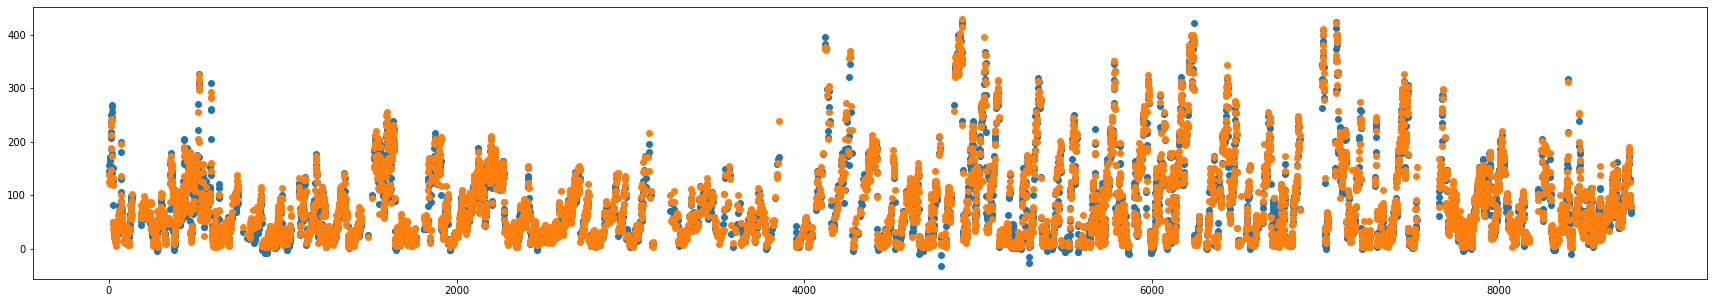

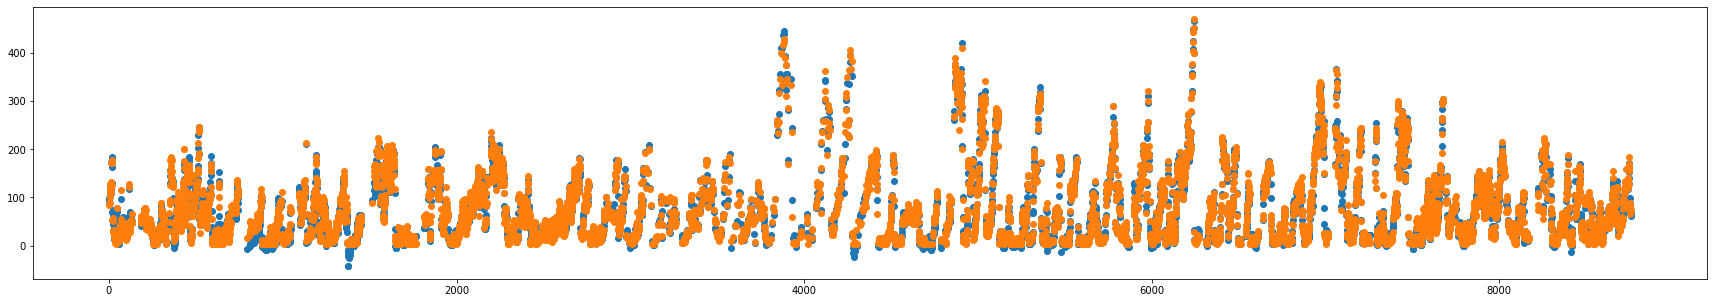

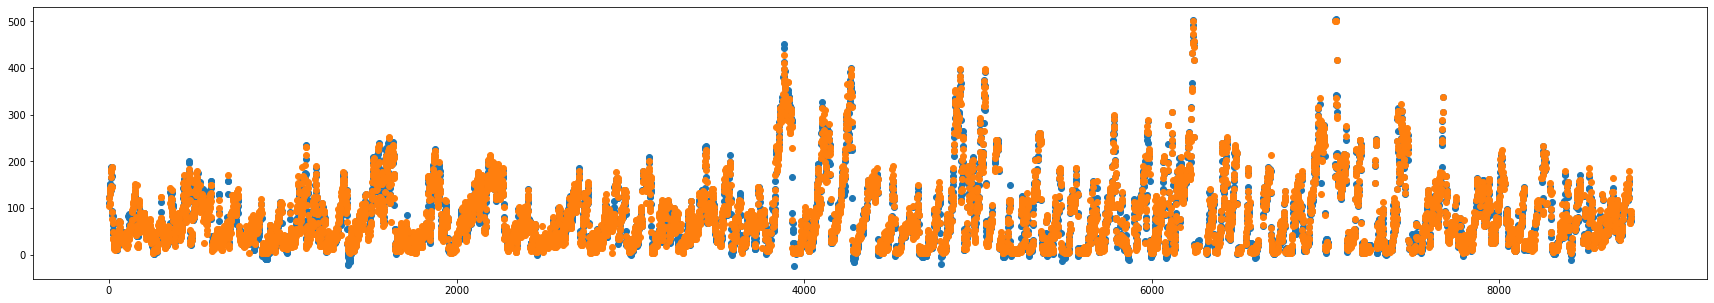

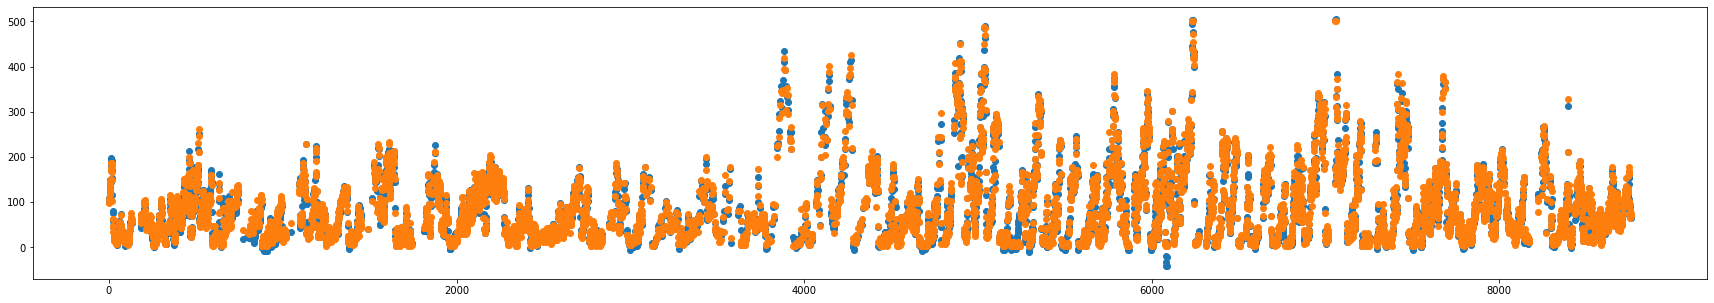

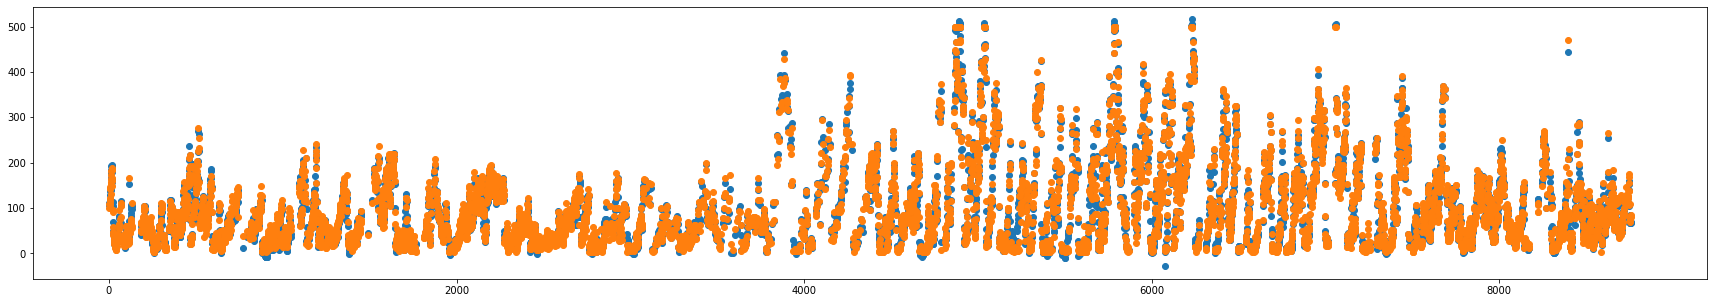

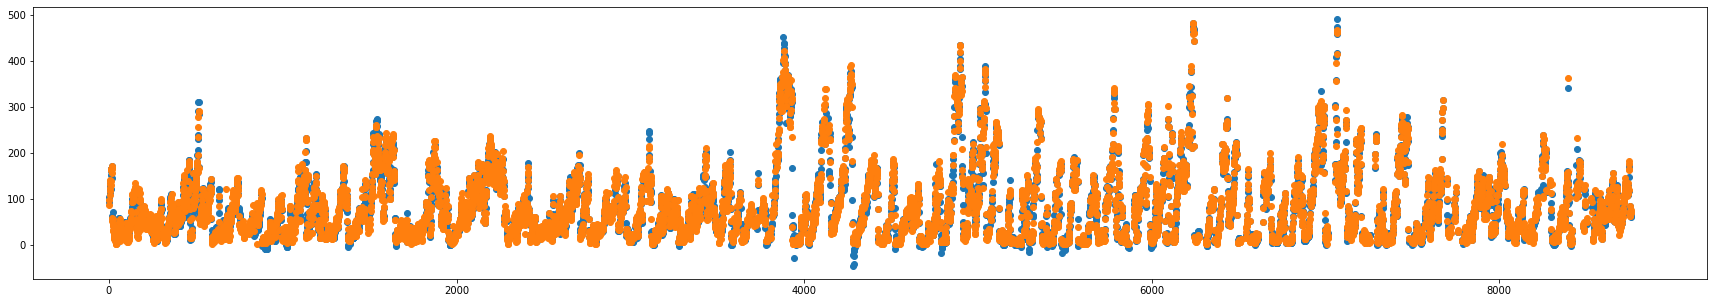

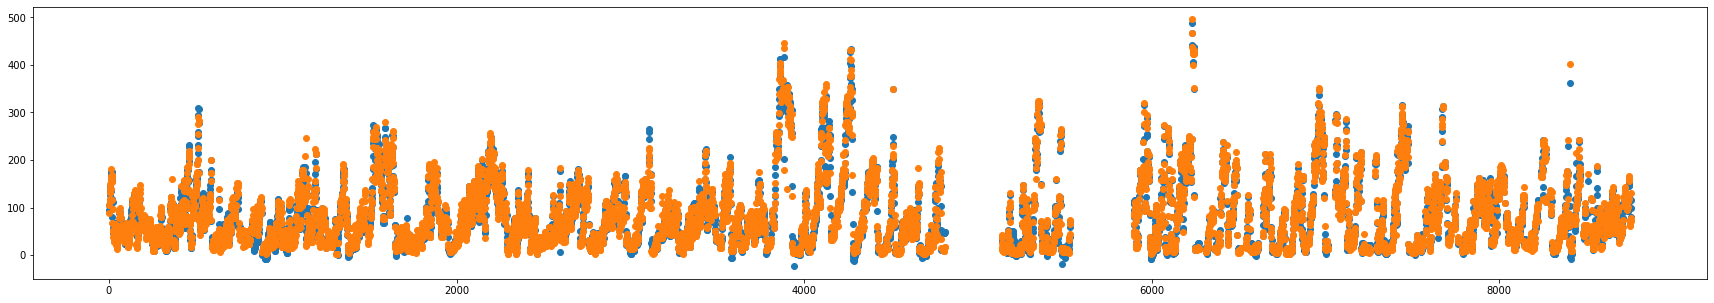

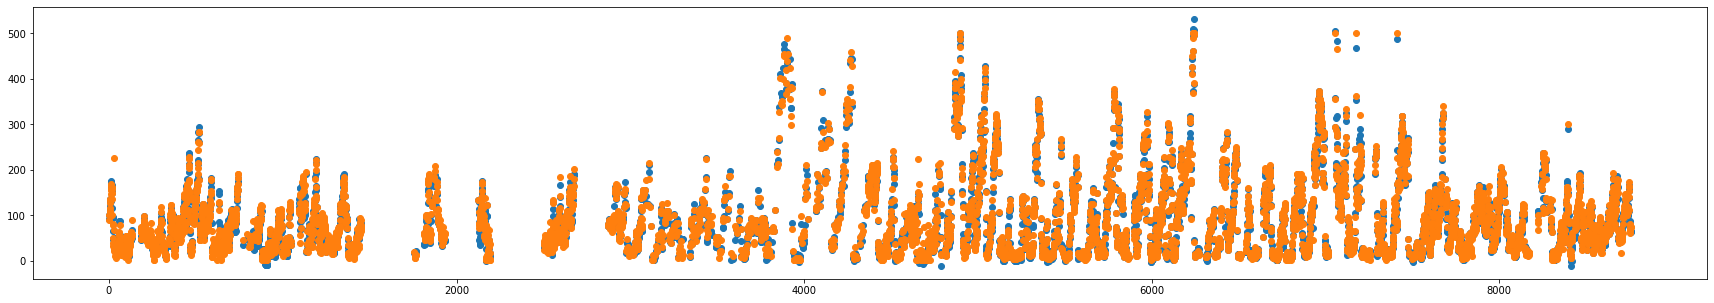

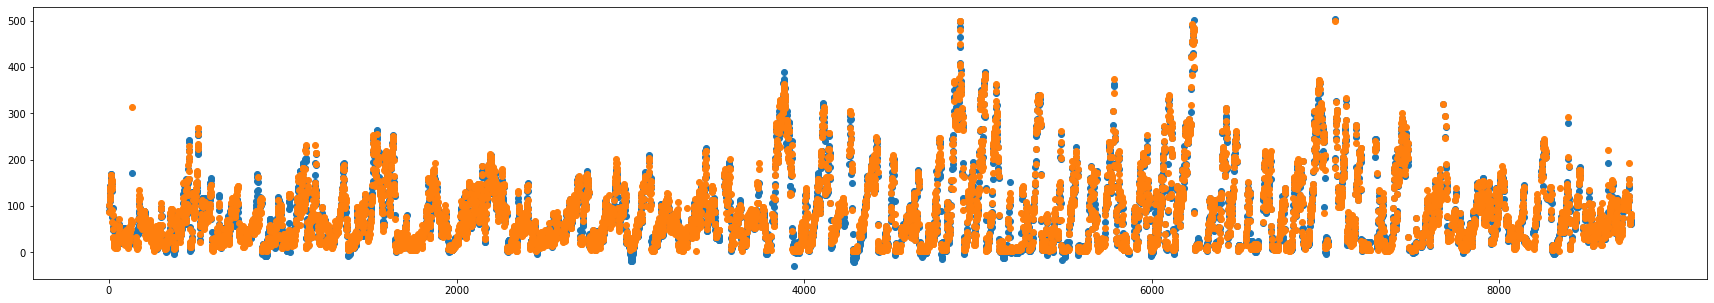

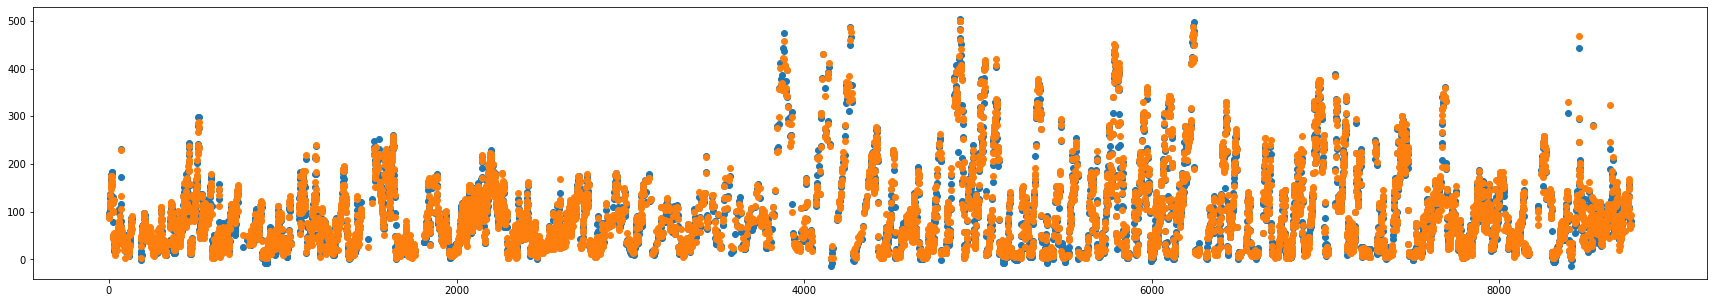

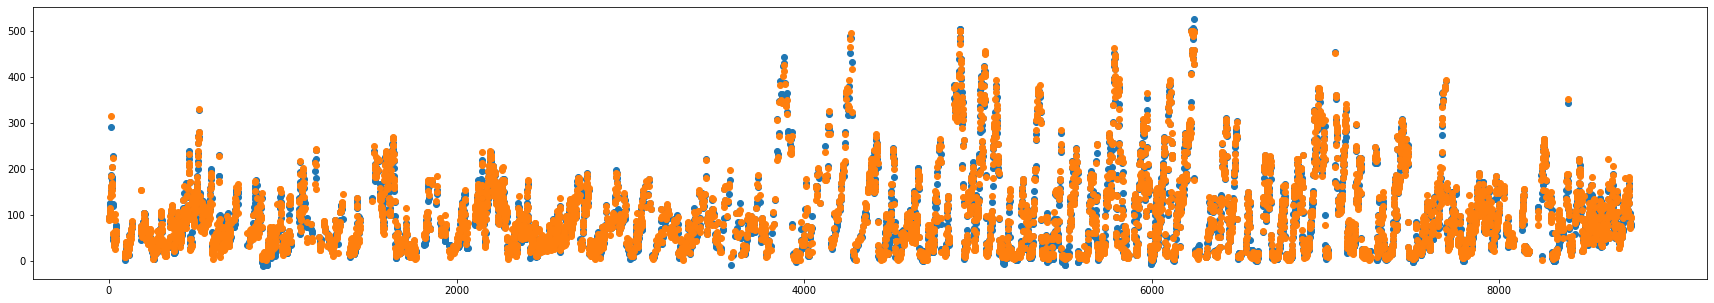

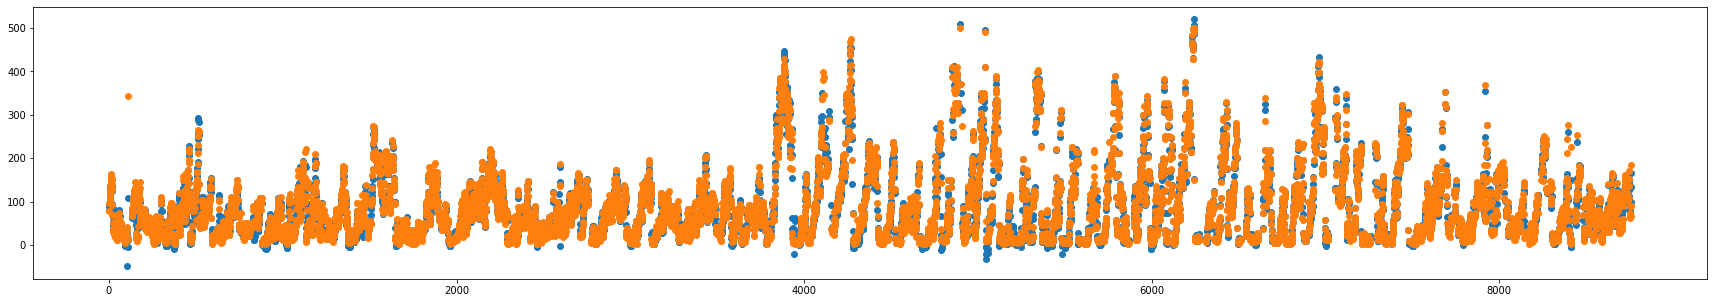

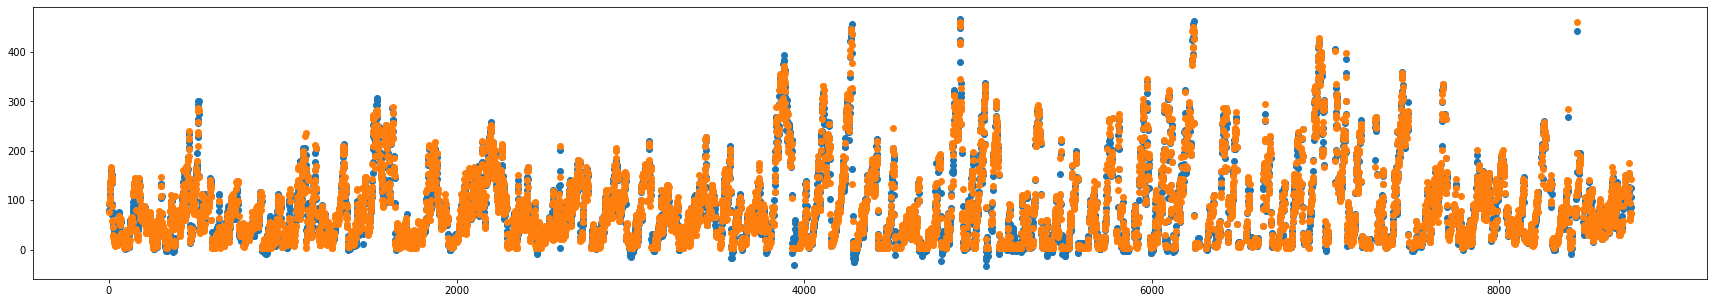

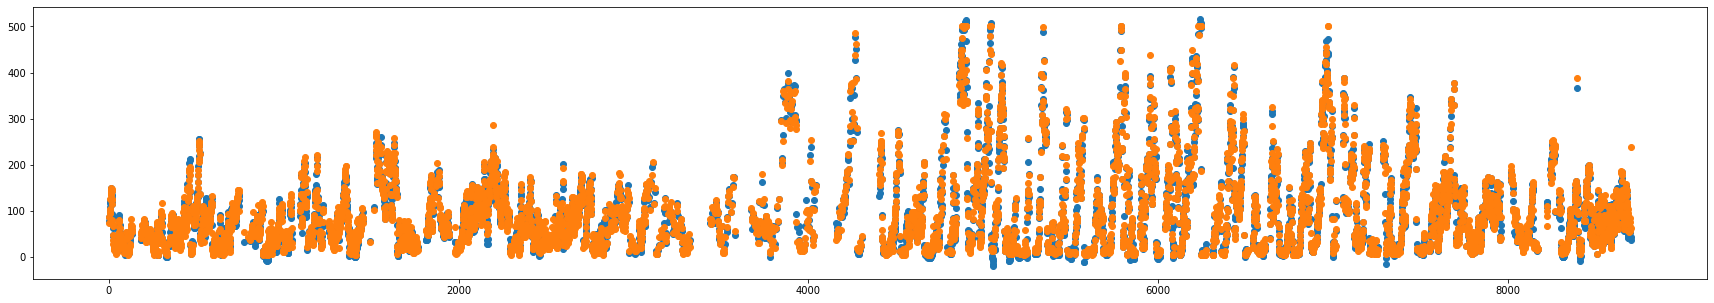

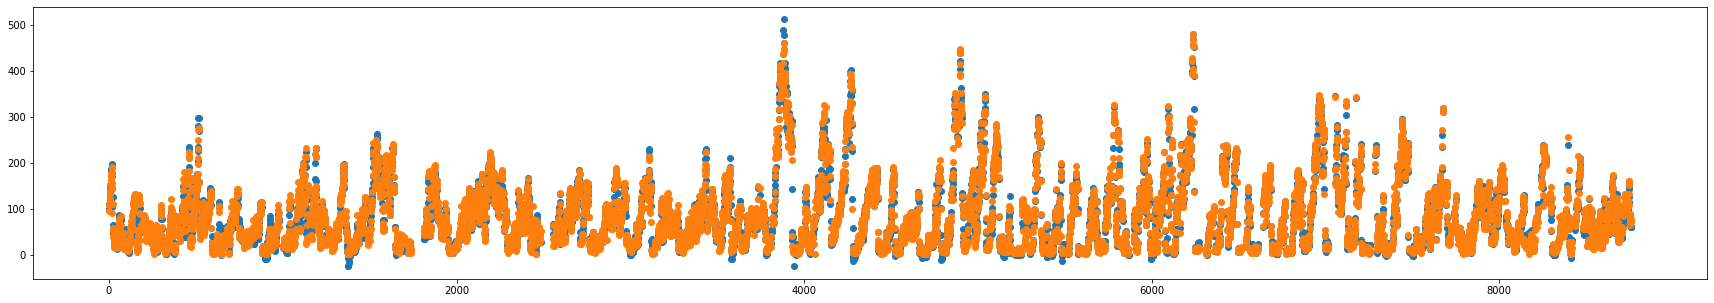

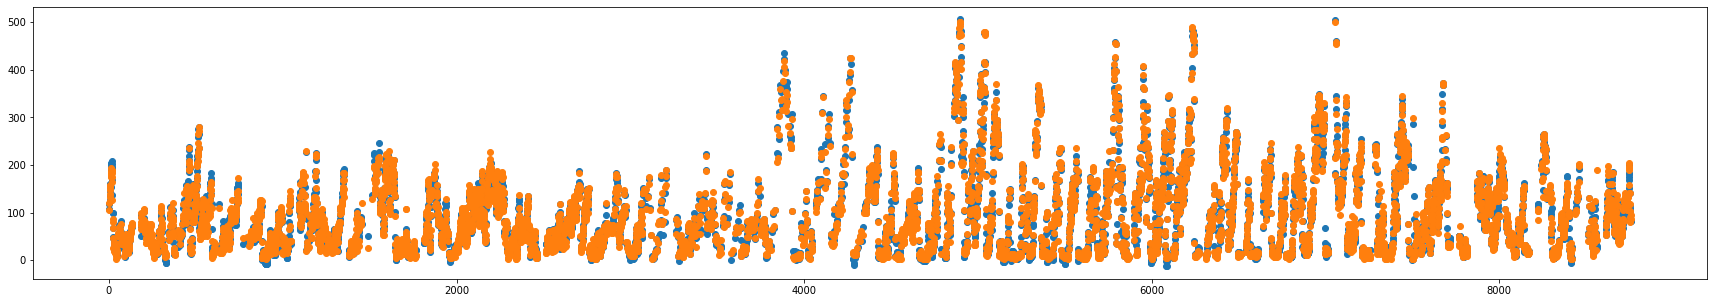

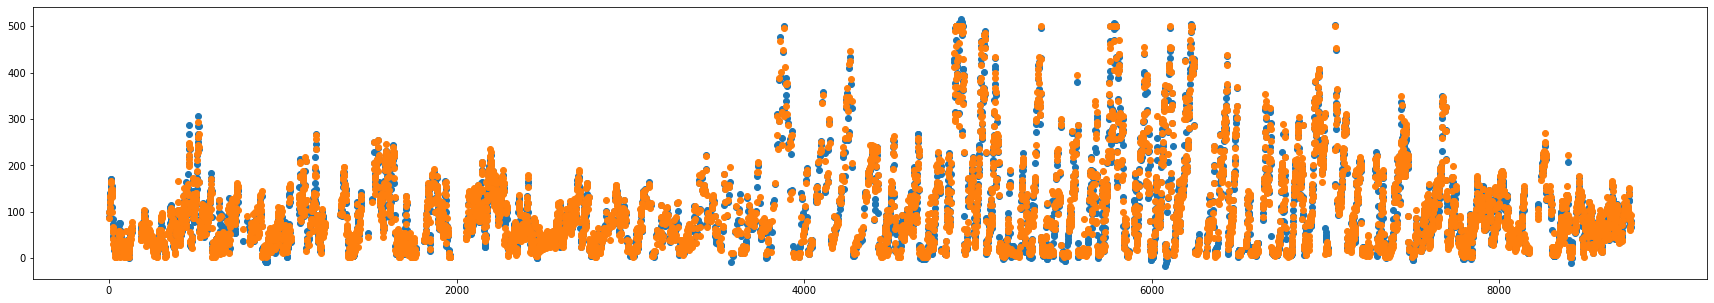

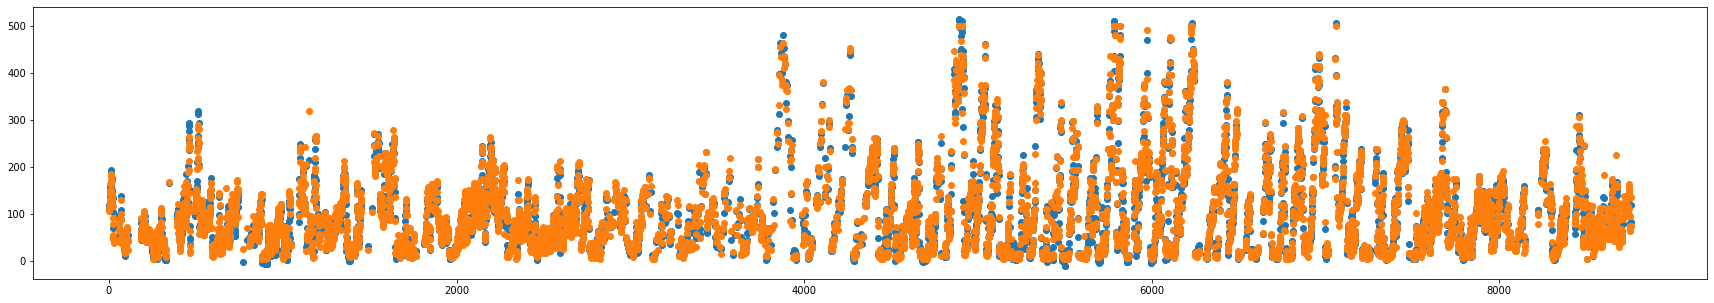

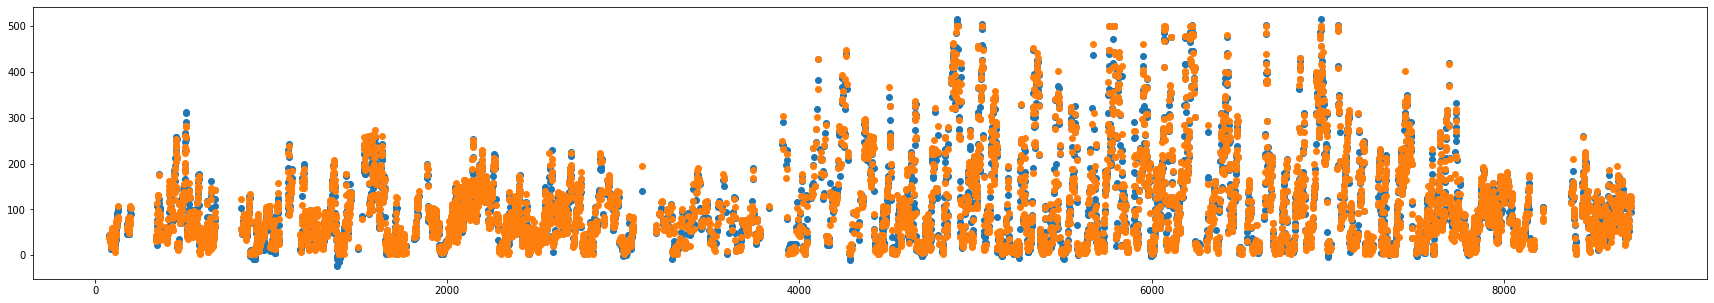

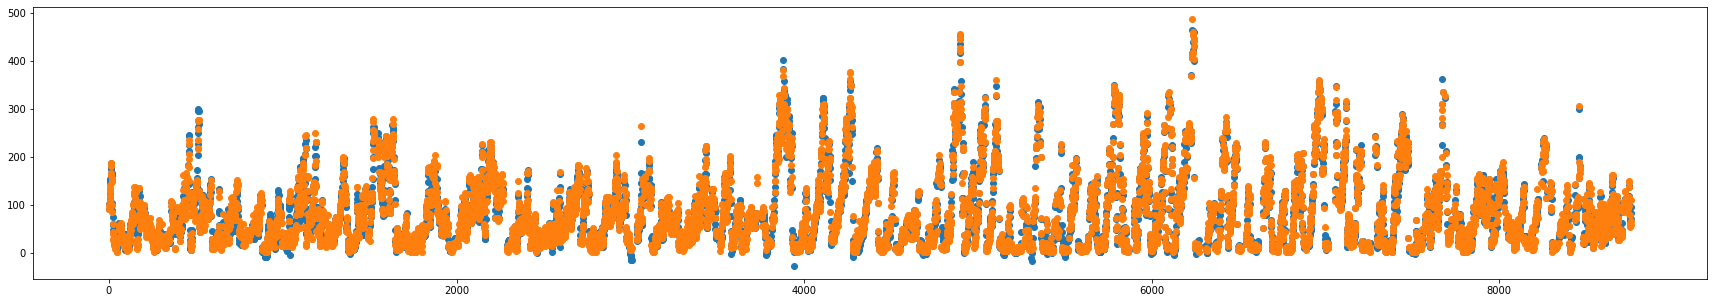

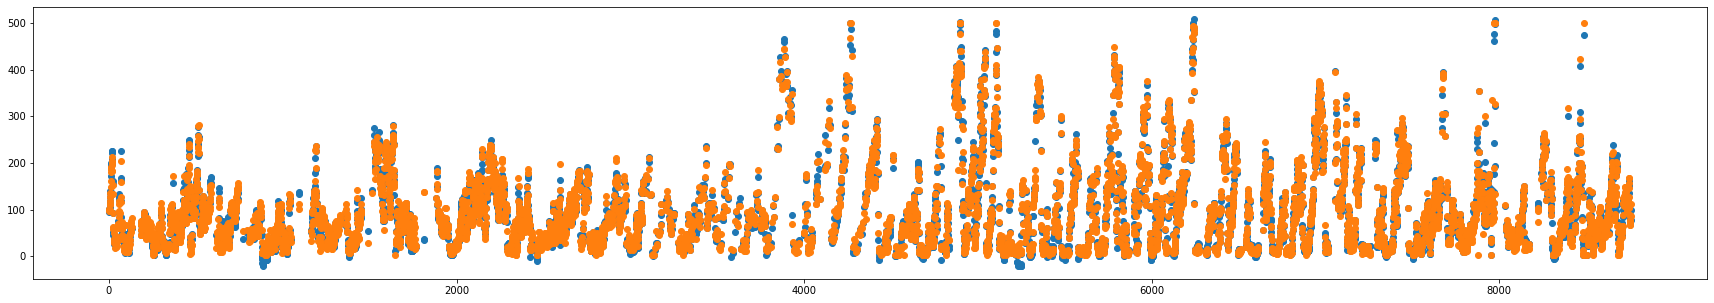

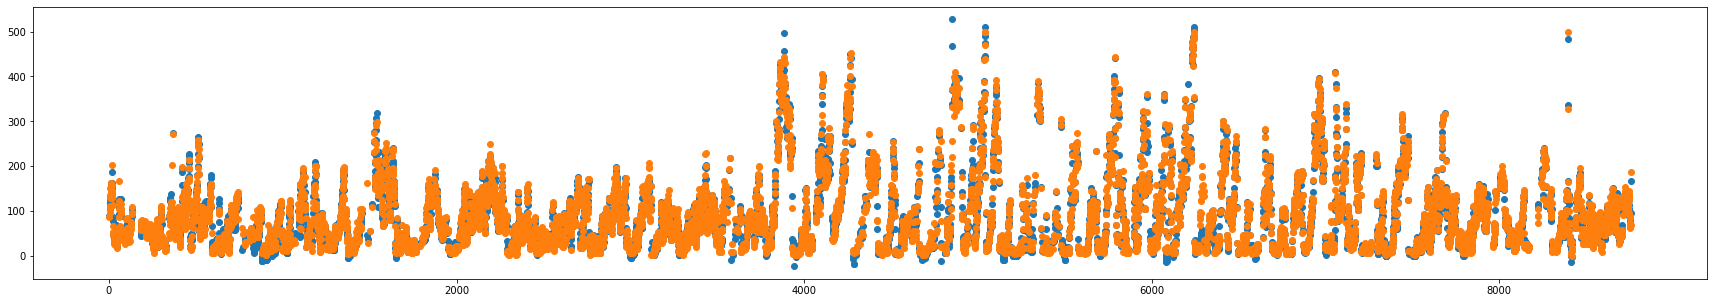

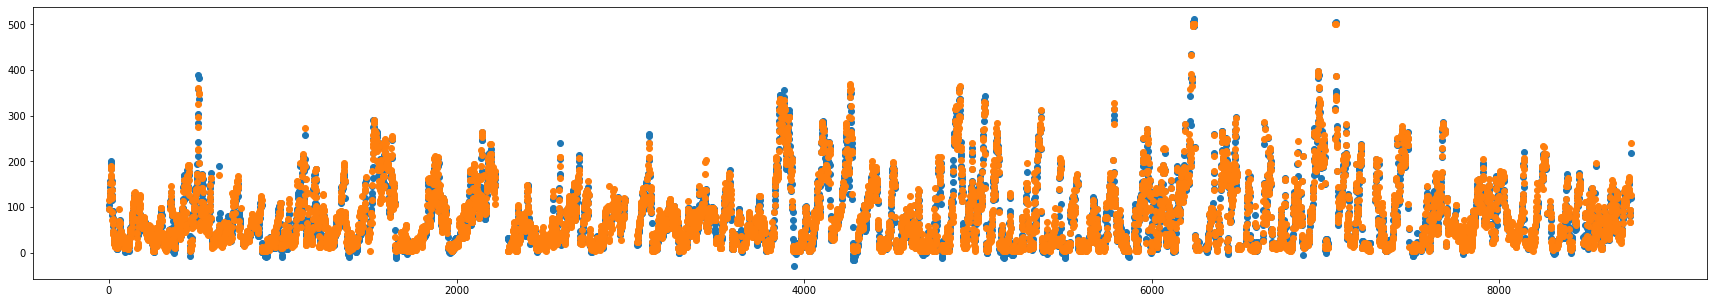

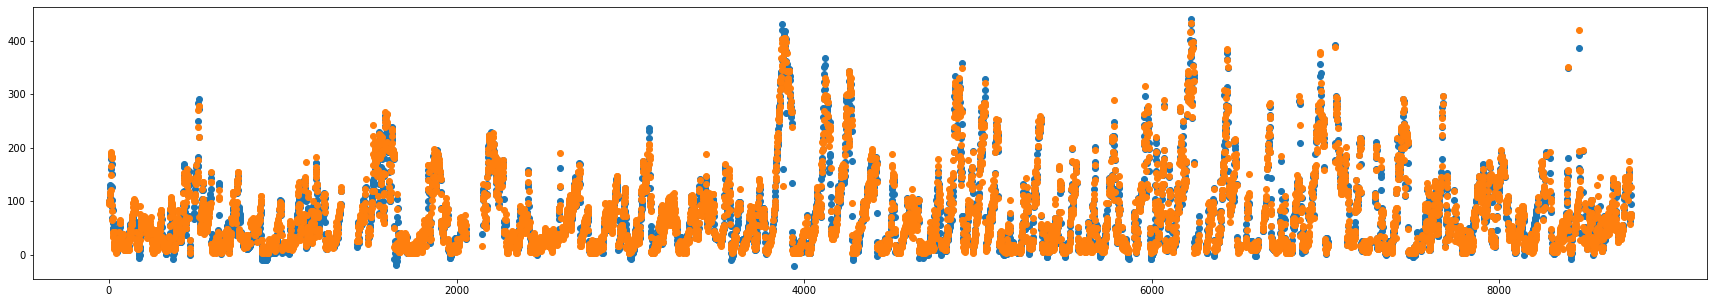

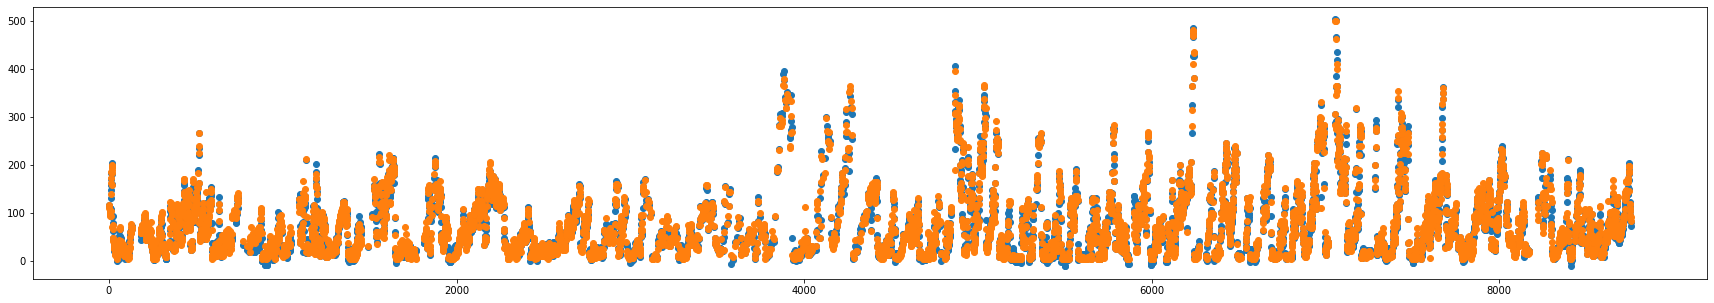

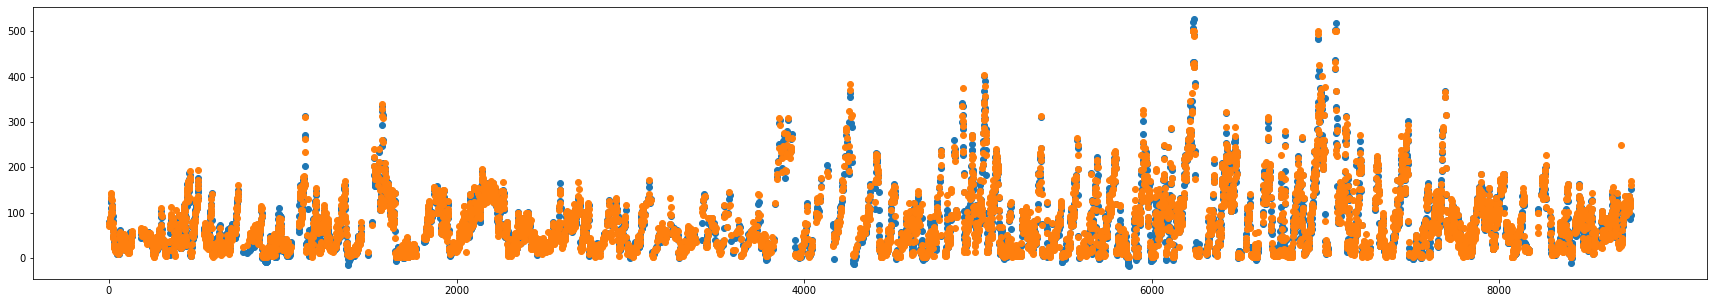

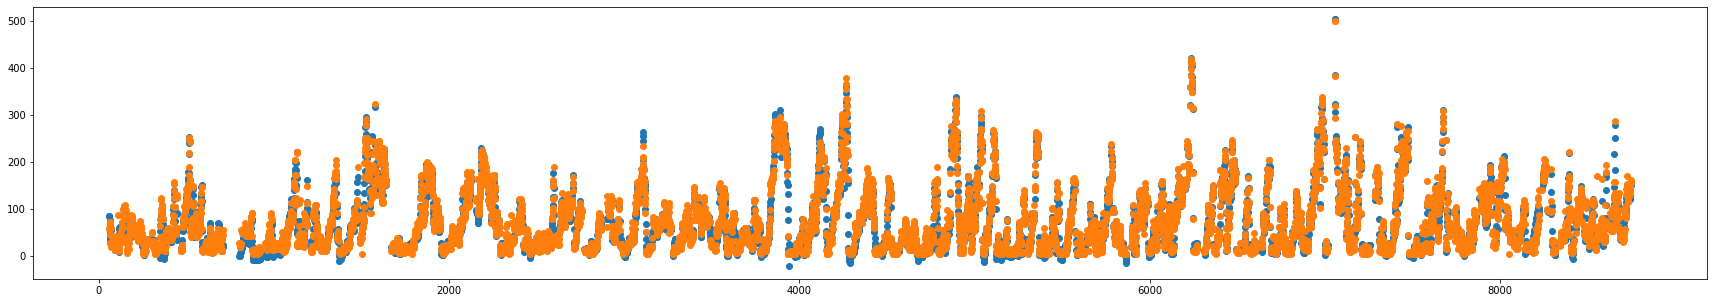

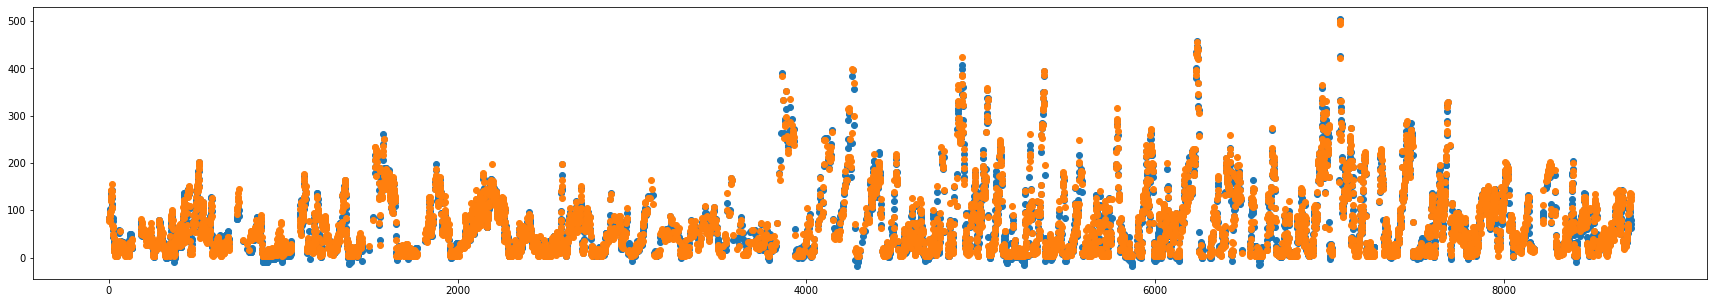

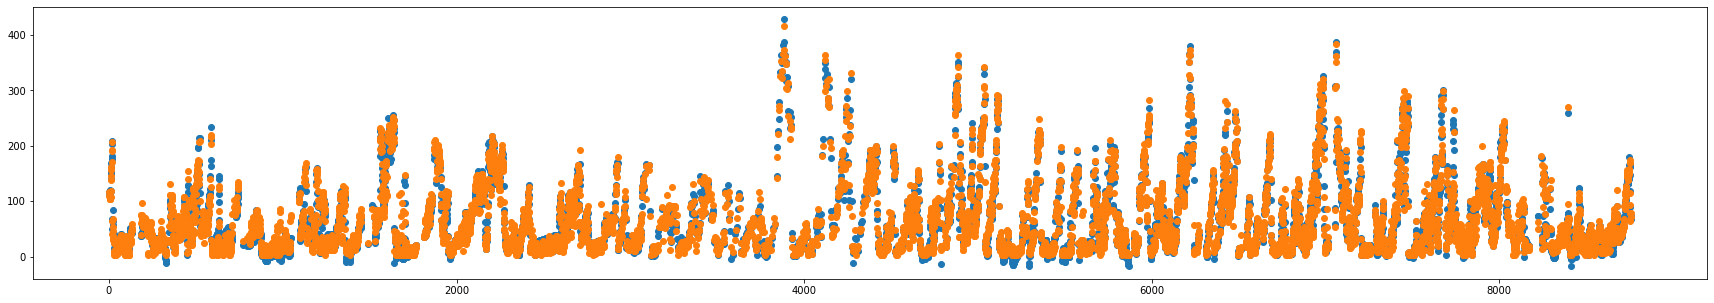

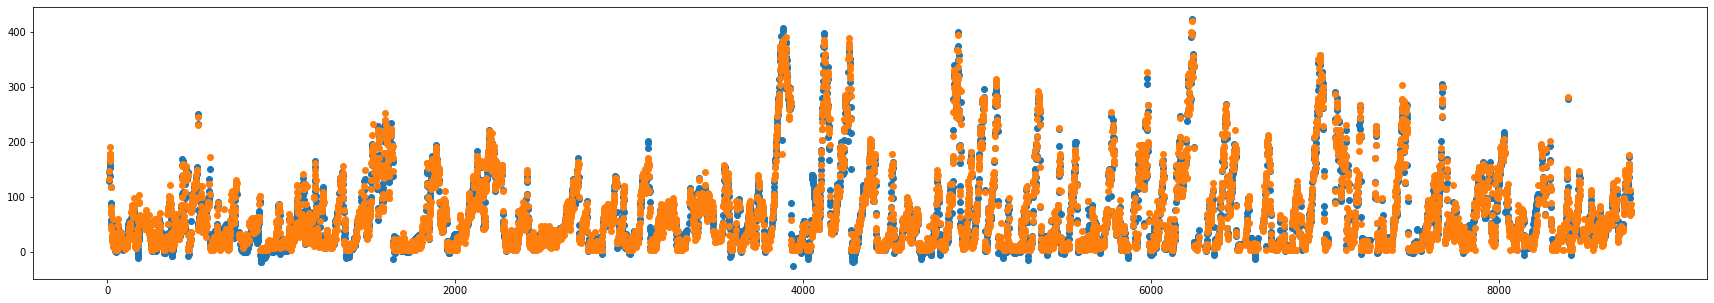

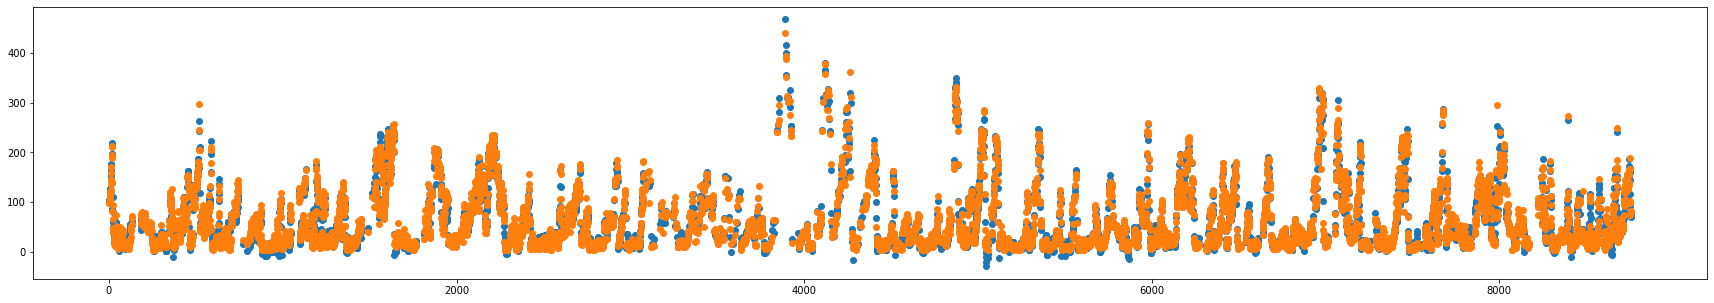

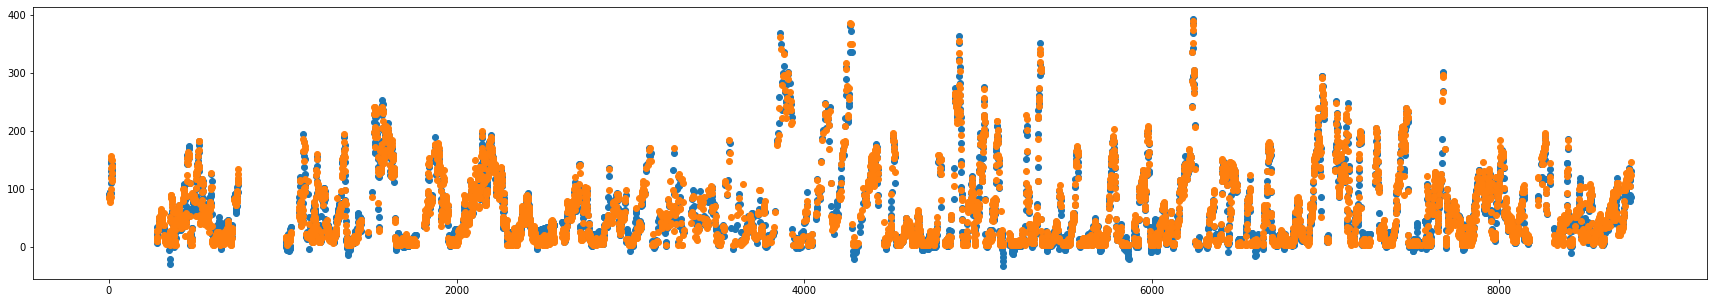

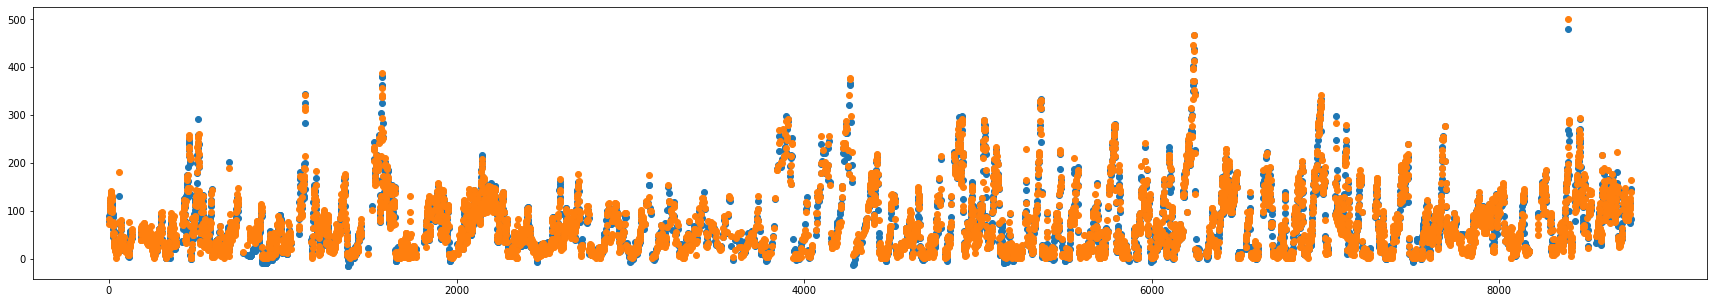

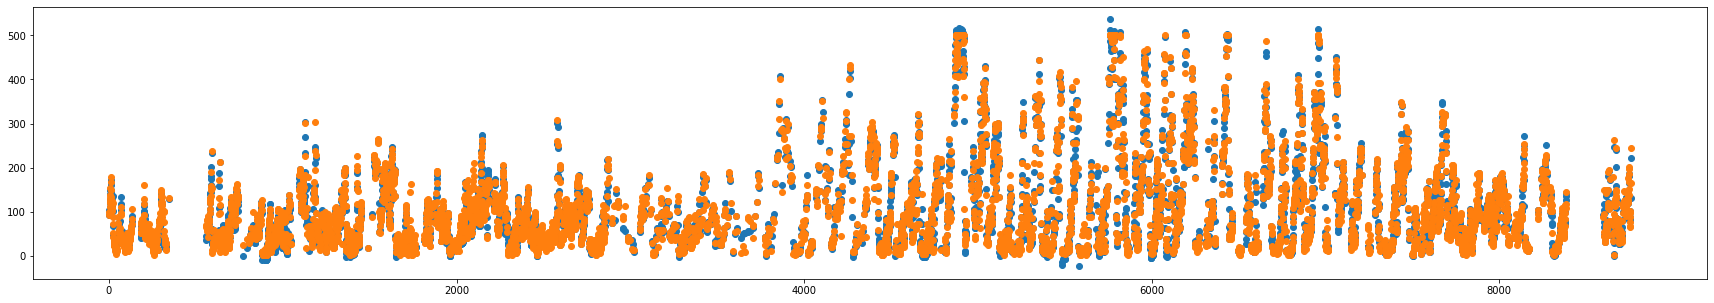

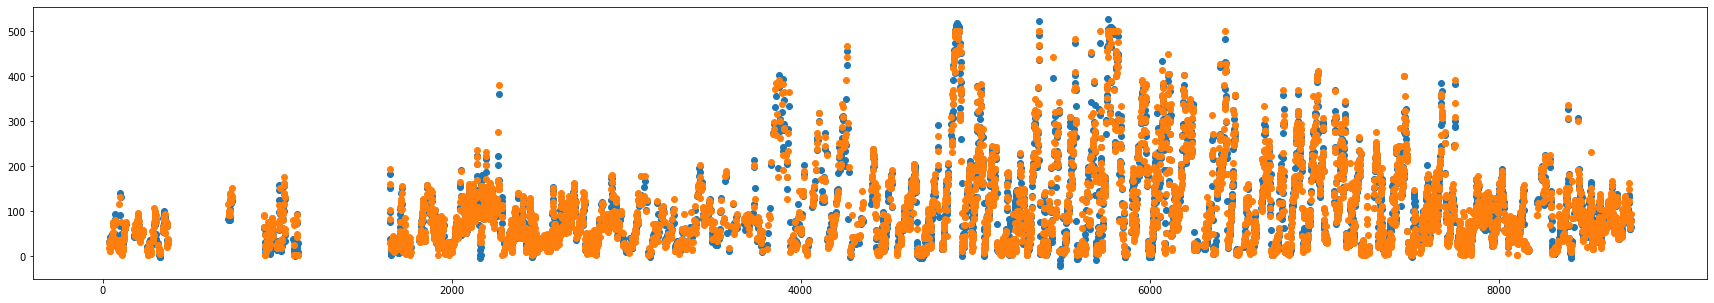

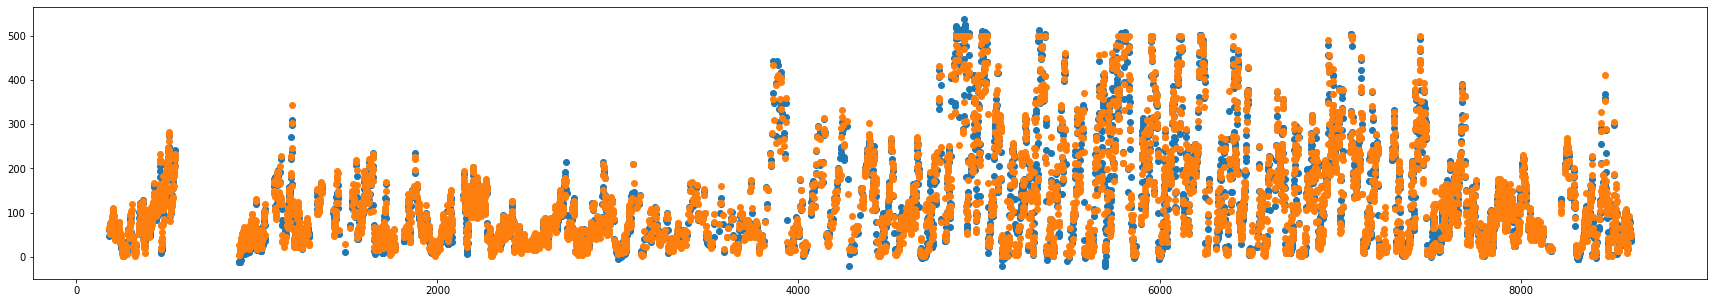

In [7]:
pred_ = model.pred(input)[1]
missing_index = torch.where(target.isnan(), 0.0, 1.0)
for i in range(36):
    plt.figure(figsize=(30,5))
    plt.scatter(input[missing_index[i] != 0].cpu().detach().numpy(), pred_[i][missing_index[i] != 0].cpu().detach().numpy())
    plt.scatter(input[missing_index[i] != 0].cpu().detach().numpy(), target[i][missing_index[i] != 0].cpu().detach().numpy())
    # plt.scatter(input[missing_index[i] != 1].cpu().detach().numpy(), pred_[i][missing_index[i] != 1].cpu().detach().numpy())

In [12]:
b = torch.abs(pred_[(a != 0)] - target2[(a != 0)])

In [21]:
torch.mean(b[b < 30])

tensor(11.1870, device='cuda:0', dtype=torch.float64)

In [22]:
torch.mean(b[b > 30])

tensor(63.8737, device='cuda:0', dtype=torch.float64)

In [23]:
torch.mean(b)

tensor(22.9017, device='cuda:0', dtype=torch.float64)

In [20]:
torch.sum(torch.abs(pred_[(a != 0)] - target2[(a != 0)]) > 00)

tensor(35737, device='cuda:0')

In [19]:
torch.sum(torch.abs(pred_[(a != 0)] - target2[(a != 0)]) > 30)

tensor(7946, device='cuda:0')